In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

### Lectura de archivos

In [2]:
tic = pd.read_csv("./data/ticdata2000.txt", sep = "\s+", header= None)

### Análisis de los DataFrame

In [3]:
 print(tic.shape)
 

(5822, 86)


In [4]:
tic.columns = [ 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE',
                   'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 
                   'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 
                   'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
                   'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT','PBESAUT', 
                   'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 
                   'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 
                   'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 
                   'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND',
                   'CARAVAN']

### Cargamos las variables y las añadimos al Dataframe

In [5]:
#Dimensión de la tabla y valores duplicados
print(tic.shape, tic.drop_duplicates().shape)


(5822, 86) (5220, 86)


In [6]:
tic[tic.duplicated()]
#Decido no eliminar los duplicados porque hay clientes que pueden tener las mismas características

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
307        35         1        4         3         8       1       4       2   
348        35         1        4         3         8       1       4       2   
393        33         1        3         3         8       1       4       2   
537        34         2        3         2         8       0       7       0   
676        33         1        3         3         8       0       4       0   
700        27         2        2         4         6       0       5       2   
707        33         1        2         3         8       0       7       0   
726        33         1        4         2         8       0       5       0   
737        31         1        3         3         7       0       2       3   
738         6         1        3         3         2       1       5       2   
779        38         1        3         3         9       1       4       1   
833         9         1        3         3         3       0       5       0   
867        22         1        1         2         5       0       5       2   
902        39         1        3         3         9       1       6       1   
1013       35         1        3         3         8       0       7       0   
1030       33         1        3         3         8       0       6       1   
1032       33         1        4         3         8       0       6       0   
1063       32         1        3         3         7       0       5       1   
1067       24         1        2         2         5       0       3       1   
1090       13         1        3         4         3       0       2       4   
1122       13         2        4         3         3       0       4       2   
1174       33         1        3         3         8       0       9       0   
1199       33         1        3         2         8       0       4       2   
1238       33         1        3         3         8       0       4       1   
1256       37         1        2         3         8       0       4       1   
1293        8         1        3         3         2       1       5       1   
1304       27         2        2         5         6       1       5       3   
1319       12         2        4         2         3       0       2       0   
1322       38         1        2         4         9       1       5       2   
1326       32         2        2         4         7       0       3       3   
1336       30         1        2         4         7       0       4       0   
1368       33         2        3         3         8       0       9       0   
1371       34         2        3         2         8       0       7       0   
1375       31         1        3         2         7       2       2       0   
1463       13         1        3         2         3       1       5       1   
1470       11         2        2         5         3       2       4       4   
1476       33         1        3         3         8       1       4       2   
1500       35         1        3         3         8       0       7       0   
1526       24         1        3         2         5       1       3       2   
1543       36         1        2         4         8       1       6       0   
1558       39         2        5         2         9       1       5       0   
1578       22         1        2         2         5       0       6       1   
1580       13         1        3         2         3       4       0       0   
1586       33         1        3         3         8       1       4       1   
1598       33         1        3         3         8       0       6       1   
1602       38         1        3         3         9       0       3       0   
1620       35         1        3         3         8       1       4       1   
1659       33         2        2         3         8       0       7       1   
1663       33         1        4         2         8       0       4       0   
1666  

In [7]:
#En el data frame vienen datos relacionados con la religion de los clientes, 
#como es ilegal ultilizar este tipo de variables las tenemos que quitar.
tic = tic.drop(['MGODRK', 'MGODPR', 'MGODOV', 'MGODGE'], axis=1)

In [8]:
#Necesitamos saber de que tipo es cada variable para saber como tratar con ellas.
#En este caso, vemos que la variable objetivo CARAVAN es un integer.
tic.dtypes.to_dict()

{'MOSTYPE': dtype('int64'),
 'MAANTHUI': dtype('int64'),
 'MGEMOMV': dtype('int64'),
 'MGEMLEEF': dtype('int64'),
 'MOSHOOFD': dtype('int64'),
 'MRELGE': dtype('int64'),
 'MRELSA': dtype('int64'),
 'MRELOV': dtype('int64'),
 'MFALLEEN': dtype('int64'),
 'MFGEKIND': dtype('int64'),
 'MFWEKIND': dtype('int64'),
 'MOPLHOOG': dtype('int64'),
 'MOPLMIDD': dtype('int64'),
 'MOPLLAAG': dtype('int64'),
 'MBERHOOG': dtype('int64'),
 'MBERZELF': dtype('int64'),
 'MBERBOER': dtype('int64'),
 'MBERMIDD': dtype('int64'),
 'MBERARBG': dtype('int64'),
 'MBERARBO': dtype('int64'),
 'MSKA': dtype('int64'),
 'MSKB1': dtype('int64'),
 'MSKB2': dtype('int64'),
 'MSKC': dtype('int64'),
 'MSKD': dtype('int64'),
 'MHHUUR': dtype('int64'),
 'MHKOOP': dtype('int64'),
 'MAUT1': dtype('int64'),
 'MAUT2': dtype('int64'),
 'MAUT0': dtype('int64'),
 'MZFONDS': dtype('int64'),
 'MZPART': dtype('int64'),
 'MINKM30': dtype('int64'),
 'MINK3045': dtype('int64'),
 'MINK4575': dtype('int64'),
 'MINK7512': dtype('int64'),

In [9]:
#Analizamos los valores nulos 
tic.isnull().sum().sort_values()
#Ninguna variable tiene valores nulos

MOSTYPE     0
PINBOED     0
PFIETS      0
PPLEZIER    0
PZEILPL     0
PBRAND      0
PWAOREG     0
PGEZONG     0
PBYSTAND    0
PPERSONG    0
PBROM       0
PWERKT      0
PTRACTOR    0
PAANHANG    0
PVRAAUT     0
PMOTSCO     0
PBESAUT     0
PLEVEN      0
AWAPART     0
AWABEDR     0
AWALAND     0
AINBOED     0
AFIETS      0
APLEZIER    0
AZEILPL     0
ABRAND      0
AWAOREG     0
AGEZONG     0
APERSONG    0
ALEVEN      0
ABROM       0
AWERKT      0
ATRACTOR    0
AAANHANG    0
AVRAAUT     0
AMOTSCO     0
ABESAUT     0
APERSAUT    0
PPERSAUT    0
PWALAND     0
PWABEDR     0
PWAPART     0
MBERMIDD    0
MBERBOER    0
MBERZELF    0
MBERHOOG    0
MOPLLAAG    0
MOPLMIDD    0
MOPLHOOG    0
MFWEKIND    0
MFGEKIND    0
MFALLEEN    0
MRELOV      0
MRELSA      0
MRELGE      0
MOSHOOFD    0
MGEMLEEF    0
MGEMOMV     0
MAANTHUI    0
MBERARBG    0
ABYSTAND    0
MBERARBO    0
MSKB1       0
MKOOPKLA    0
MINKGEM     0
MINK123M    0
MINK7512    0
MINK4575    0
MINK3045    0
MINKM30     0
MZPART      0
MZFOND

### Análisis de la variable objetivo y tratamiento. 'CARAVAN'

Vemos que valores puede tomar la variable, en este caso 0 y 1. 
0 corresponde a que no contrata la póliza de caravanas y 1 a que si contrata la póliza de caravanas.

In [10]:
tic_status = tic['CARAVAN']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

tic_status_conteo = tic['CARAVAN'].value_counts().reset_index()
tic_status_pc = pd.merge(tic_status, tic_status_conteo, on=['index'], how='inner')
tic_status_pc

index    percent  CARAVAN
0      0  94.022673     5474
1      1   5.977327      348

Hay un 94.03% de clientes que no contratan la poliza y un 5.97% que si 

In [11]:
fig = px.histogram(tic_status_pc, x='index', y=['percent'])
fig.show()

Podemos ver que el dataset esta muy desbalanceado.

### Análisis de las variables

In [12]:
tic.describe()

MOSTYPE     MAANTHUI      MGEMOMV     MGEMLEEF     MOSHOOFD  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean     24.253349     1.110615     2.678805     2.991240     5.773617   
std      12.846706     0.405842     0.789835     0.814589     2.856760   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

            MRELGE       MRELSA       MRELOV     MFALLEEN     MFGEKIND  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      6.183442     0.883545     2.290450     1.887667     3.230333   
std       1.909482     0.965924     1.722645     1.799928     1.619973   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     0.000000     1.000000     0.000000     2.000000   
50%       6.000000     1.000000     2.000000     2.000000     3.000000   
75%       7.000000     1.000000     3.000000     3.000000     4.000000   
max       9.000000     7.000000     9.000000     9.000000     9.000000   

          MFWEKIND     MOPLHOOG     MOPLMIDD     MOPLLAAG     MBERHOOG  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      4.300240     1.461010     3.351254     4.572484     1.895053   
std       2.005283     1.622967     1.761052     2.298125     1.798321   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     0.000000     2.000000     3.000000     0.000000   
50%       4.000000     1.000000     3.000000     5.000000     2.000000   
75%       6.000000     2.000000     4.000000     6.000000     3.000000   
max       9.000000     9.000000     9.000000     9.000000     9.000000   

          MBERZELF     MBERBOER     MBERMIDD     MBERARBG     MBERARBO  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      0.397973     0.522329     2.899004     2.219856     2.306424   
std       0.775073     1.056926     1.839675     1.730840     1.692843   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     2.000000     1.000000     1.000000   
50%       0.000000     0.000000     3.000000     2.000000     2.000000   
75%       1.000000     1.000000     4.000000     3.000000     3.000000   
max       5.000000     9.000000     9.000000     9.000000     9.000000   

              MSKA        MSKB1        MSKB2         MSKC         MSKD  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      1.620749     1.606836     2.202508     3.758674     1.067331   
std       1.722882     1.330664     1.529319     1.935568     1.303175   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     2.000000     0.000000   
50%       1.000000     2.000000     2.000000     4.000000     1.000000   
75%       2.000000     2.000000     3.000000     5.000000     2.000000   
max       9.000000     9.000000     9.000000     9.000000     9.000000   

            MHHUUR       MHKOOP        MAUT1        MAUT2        MAUT0  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      4.236860     4.771728     6.040364     1.316386     1.959464   
std       3.089302     3.089837     1.552799     1.203072     1.599714   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     2.000000     5.000000     0.000000     1.000000   
50%       4.000000     5.000000     6.000000     1.000000     2.000000   
75%       7.000000     7.000000     7.000000     2.000000     3.000000   
max       9.000000     9.000000     9.000000     7.000000     9.000000   

         

Las variables no necesitan transformación, ya que, son todas números.

In [13]:
#Vemos cuantos valores unicos hay en cada variable
for i, var in enumerate(tic.columns):
    print(i,sorted(tic[var].unique()))


0 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
1 [1, 2, 3, 4, 5, 6, 7, 8, 10]
2 [1, 2, 3, 4, 5]
3 [1, 2, 3, 4, 5, 6]
4 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
5 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
6 [0, 1, 2, 3, 4, 5, 6, 7]
7 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
8 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
9 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
11 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
12 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
13 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
14 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
15 [0, 1, 2, 3, 4, 5]
16 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
17 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
18 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
19 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
20 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
21 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
22 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
23 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
24 [0, 1, 2, 3, 4, 5, 6, 7, 9]
25 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
26 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
27 [0, 1, 2, 3, 4, 5

Vemos como muchas variables son categoricas y estan codificadas.

Como he analizado, la mayoria de variables tienen valores hasta el 10, por lo que cambio en la función los valores únicos a 10.

In [14]:
def dame_variables_categoricas(dataset=None):
   
    if dataset is None:
        print(u'\nFaltan argumentos por pasar a la función')
        return 1
    lista_variables_categoricas = []
    other = []
    for i in dataset.columns:
        if (dataset[i].dtype!=float) & (dataset[i].dtype!=int):
            unicos = int(len(np.unique(dataset[i].dropna(axis=0, how='all'))))
            if unicos < 10:
                lista_variables_categoricas.append(i)
            else:
                other.append(i)

    return lista_variables_categoricas, other
    

In [15]:
categoricas, other = dame_variables_categoricas(tic)
print(len(categoricas), len(other))

51 31


Según la función, tengo 51 variables categorigas y 31 numéricas. De todas formas miro una a una para comprobarlo y clasificarlas de otra manera si no es así. 

In [16]:
tic_numericas = tic[['MAANTHUI', 'MFGEKIND', 'MFWEKIND', 'MHHUUR', 'MHKOOP', 'MAUT1', 
             'MAUT2', 'MAUT0', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
             'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN',
             'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND']]
tic_numericas.shape
#29 variables continuas

(5822, 29)

In [17]:
tic_categoricas = tic.drop(['MAANTHUI', 'MFGEKIND', 'MFWEKIND', 'MHHUUR', 'MHKOOP', 'MAUT1', 
             'MAUT2', 'MAUT0', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
             'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN',
             'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND'], axis=1)
tic_categoricas.shape
#57 variables categóricas


(5822, 53)

He añadido más variables categóricas a la lista que me proporcionaba la función, ya que, aunque tuviera valor menores que 10 no se podian clasificar como continuas. Vemos que existen variables continuas y categoricas, el análisis va ha ser distinto dependiendo de que sean. Para las variables categoricas el análisis multivariable hay que realizarlo de distinta manera, estudiando métodos propios de variables categóricas como chramers.

Distribucion de las variables

In [18]:
def plot_feature(df, col_name, isContinuous, target):
    """
    Visualize a variable with and without faceting on the loan status.
    - df dataframe
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    count_null = df[col_name].isnull().sum()
    if isContinuous:
        
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name+ ' Numero de nulos: '+str(count_null))
    plt.xticks(rotation = 90)


    if isContinuous:
        sns.boxplot(x=col_name, y=target, data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by '+target)
    else:
        data = df.groupby(col_name)[target].value_counts(normalize=True).to_frame('proportion').reset_index() 
        data.columns = [i, target, 'proportion']
        #sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        ax2.set_ylabel(target+' fraction')
        ax2.set_title(target)
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

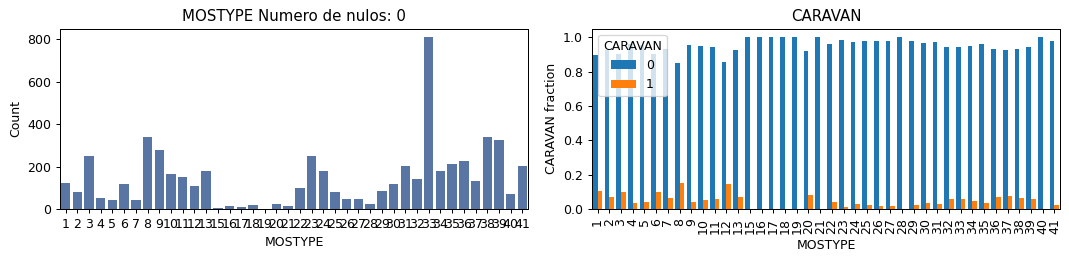

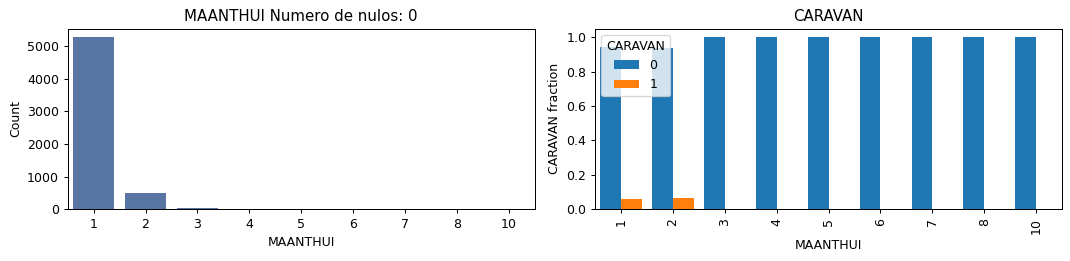

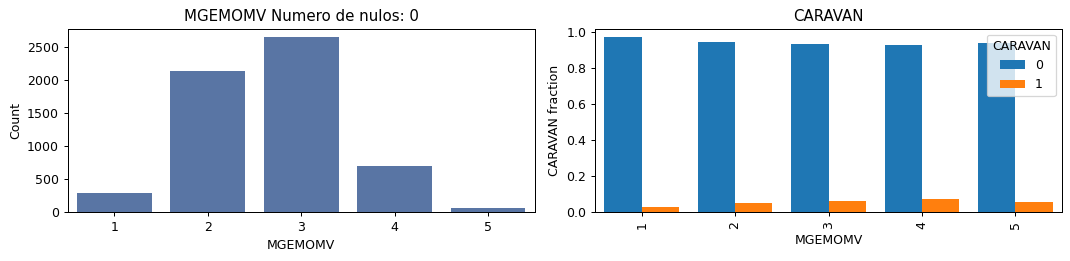

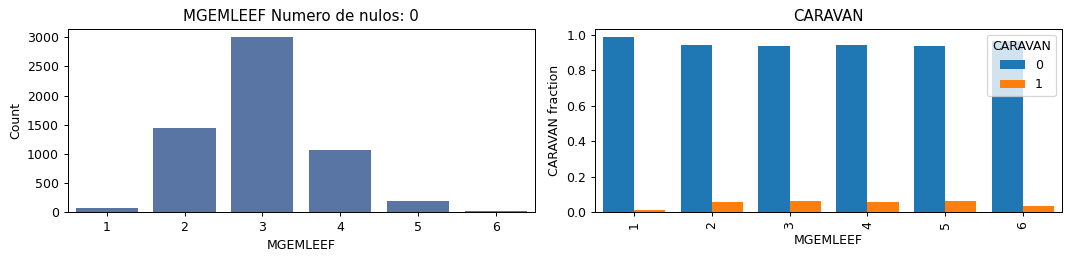

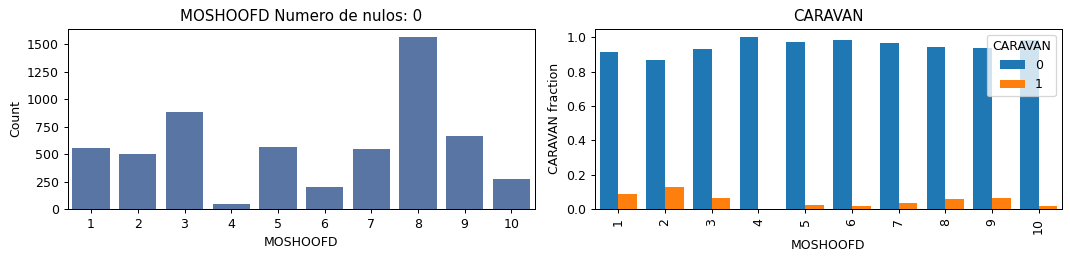

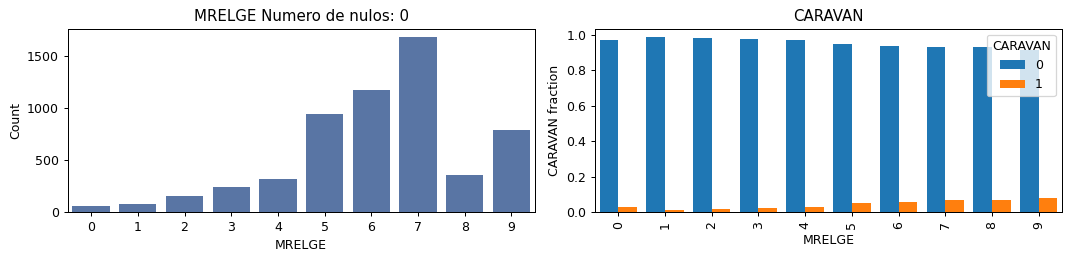

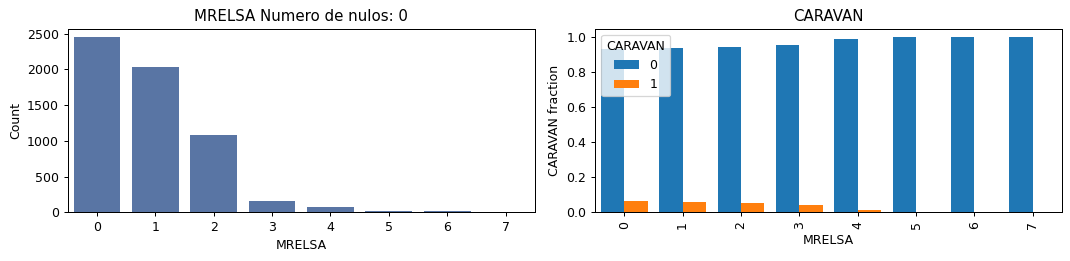

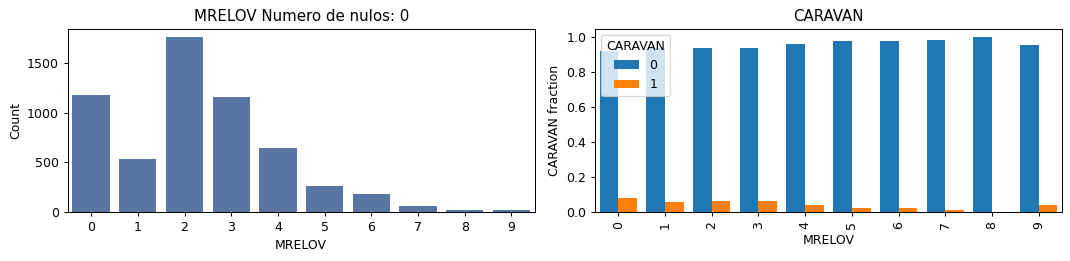

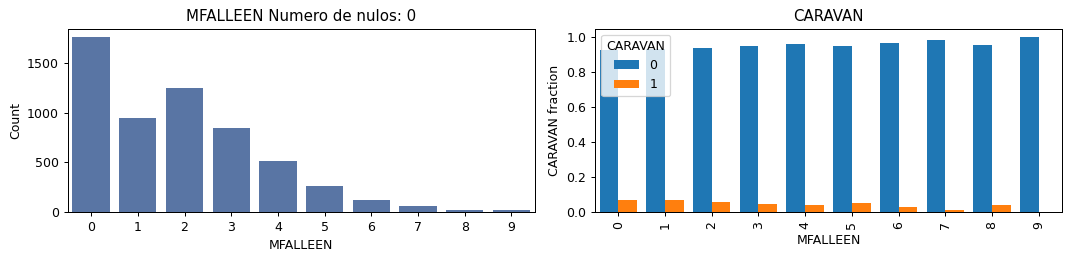

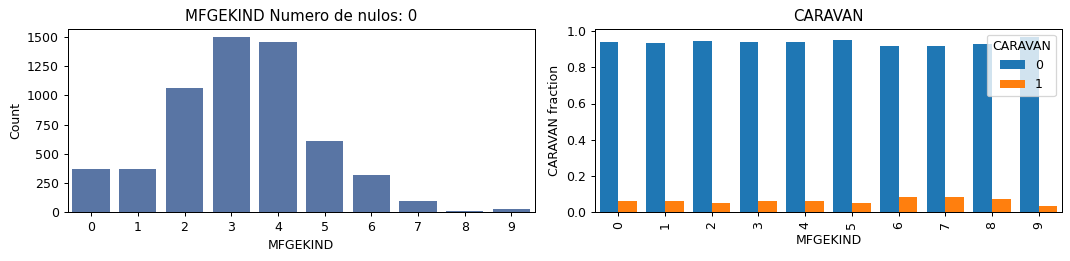

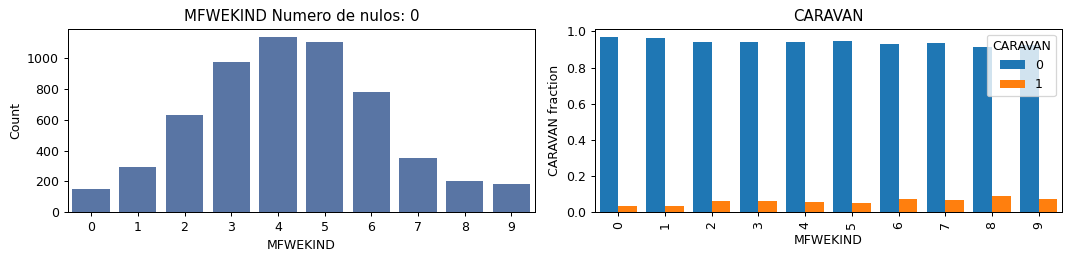

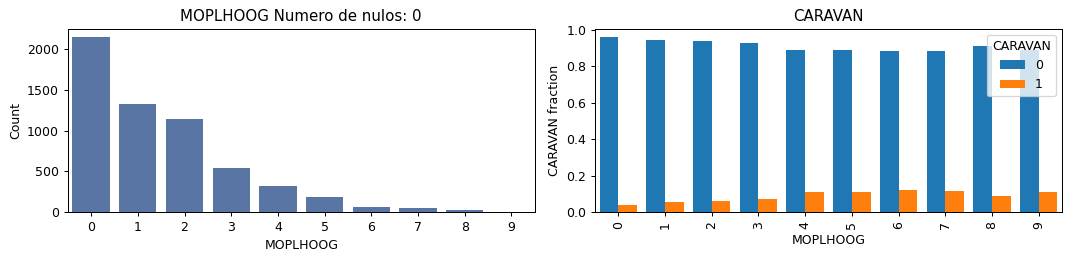

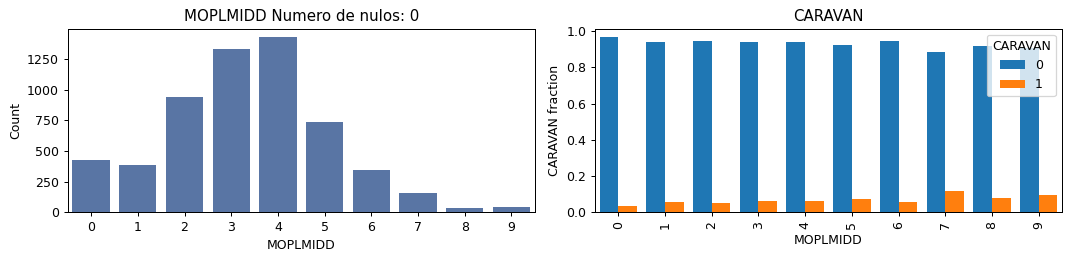

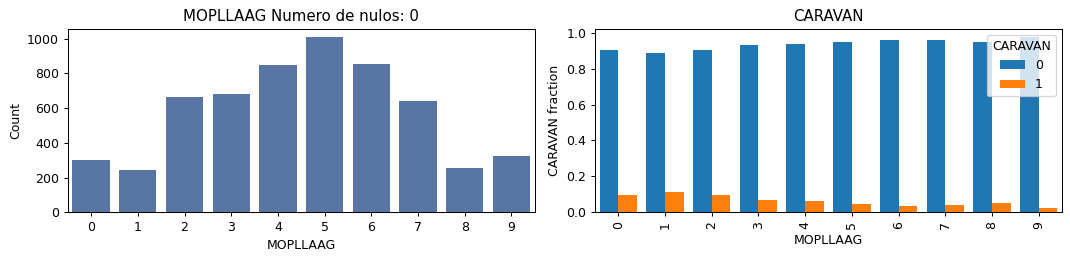

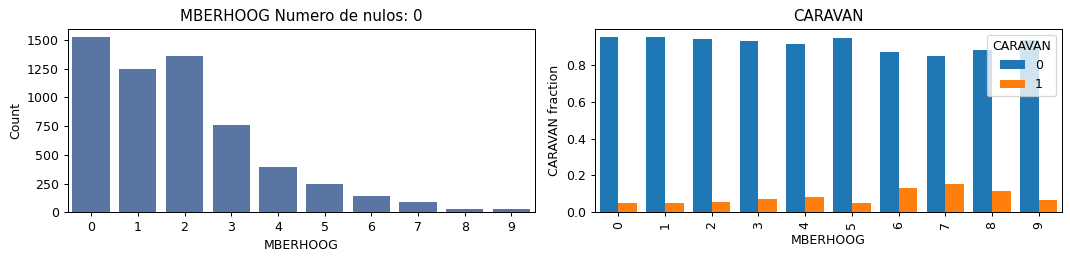

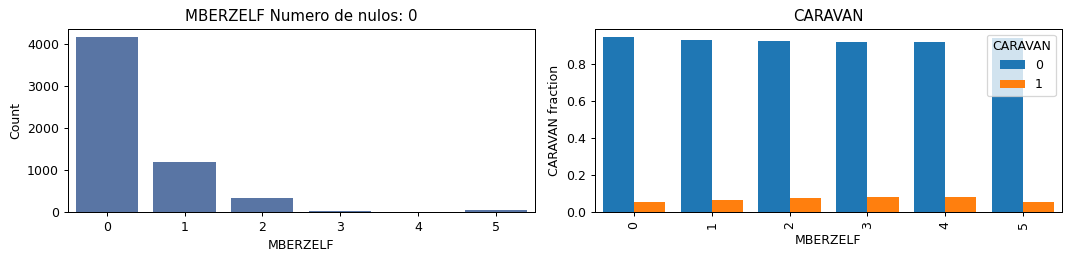

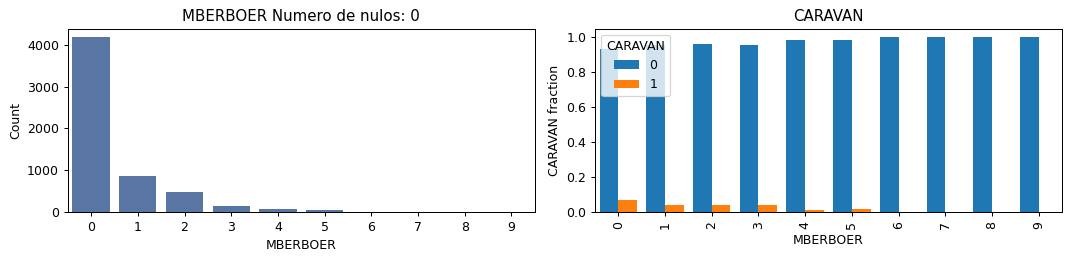

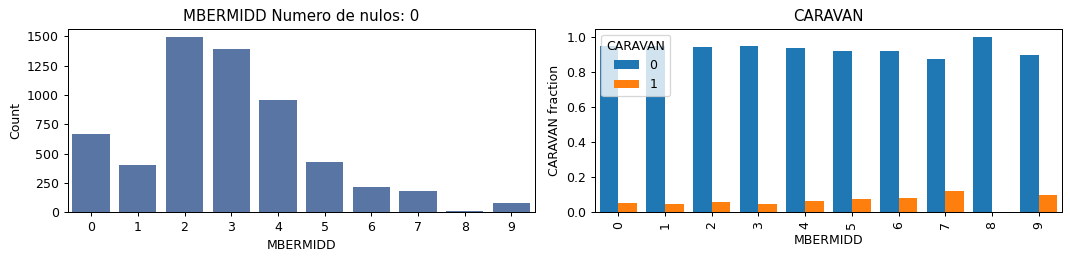

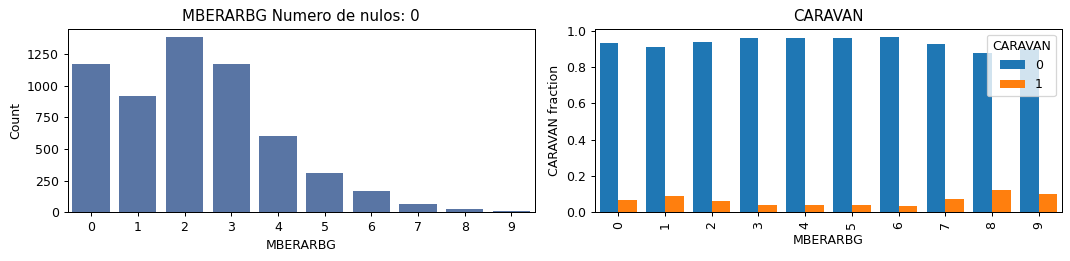

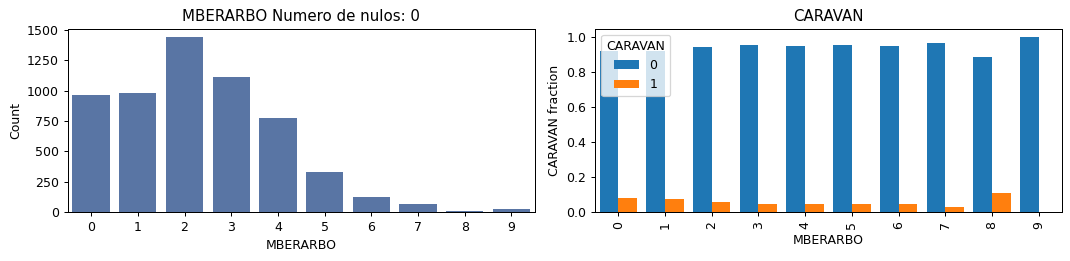

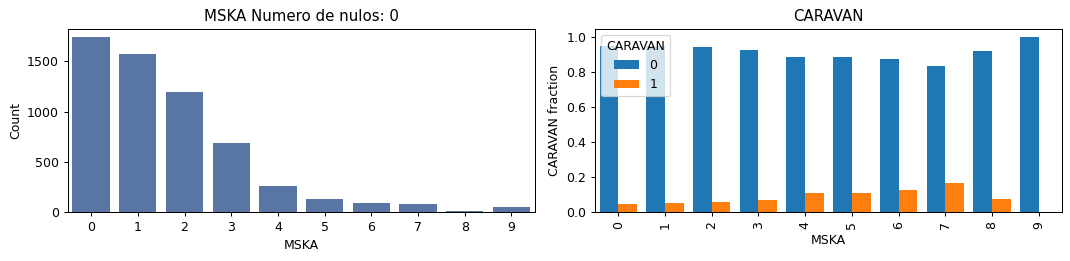

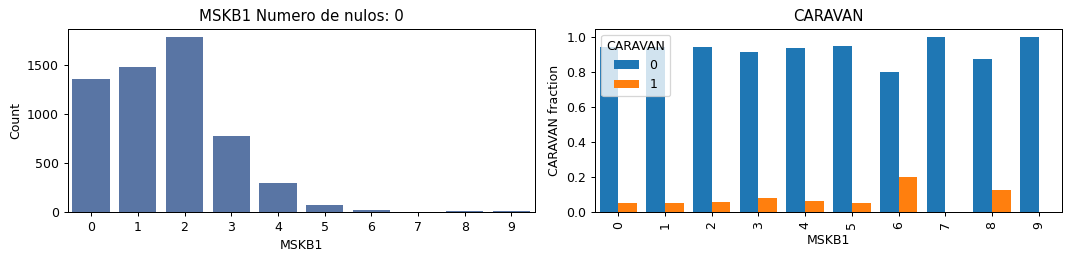

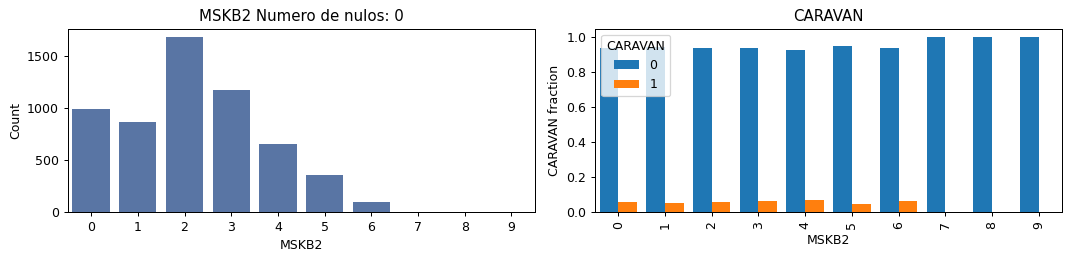

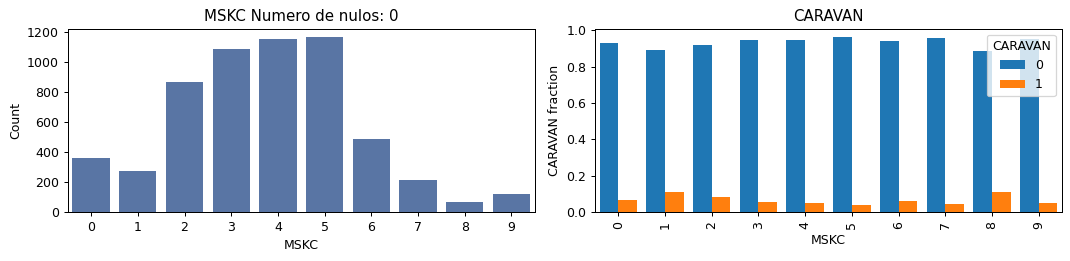

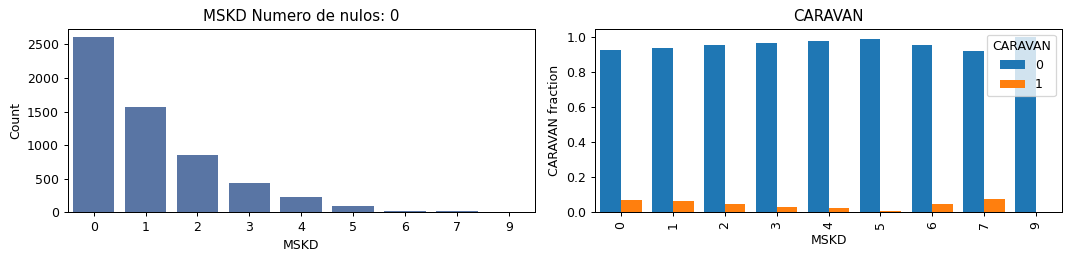

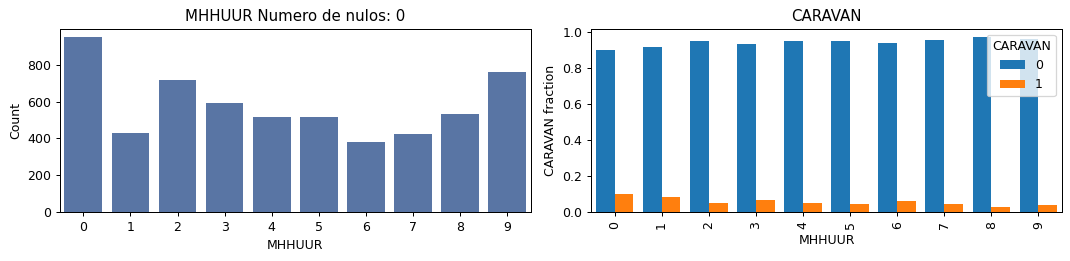

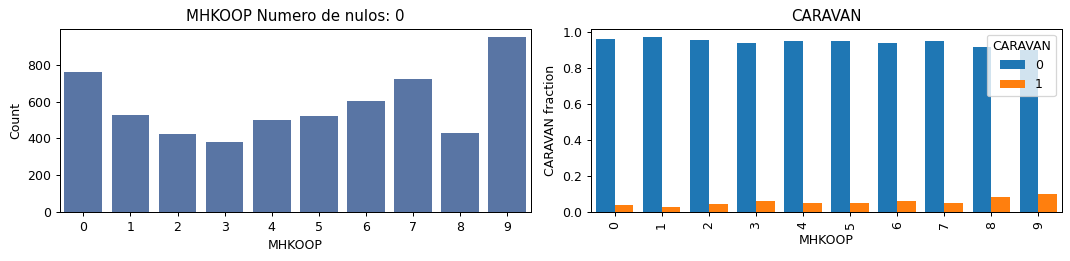

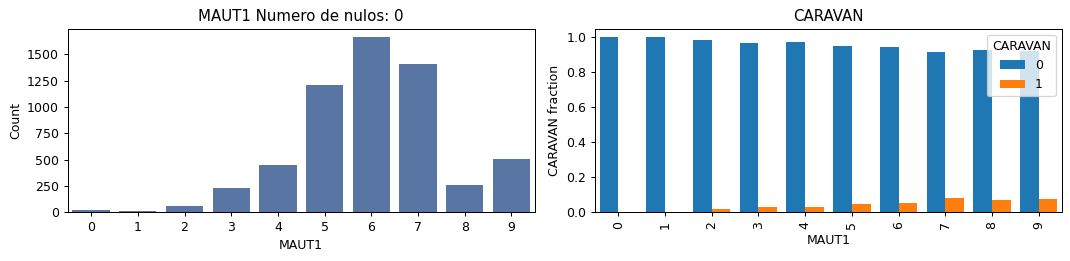

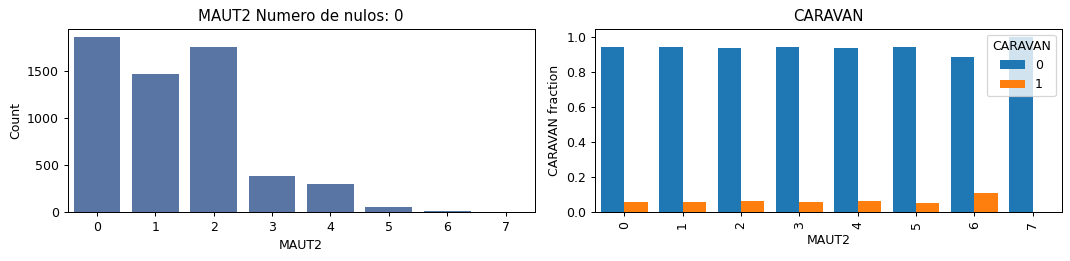

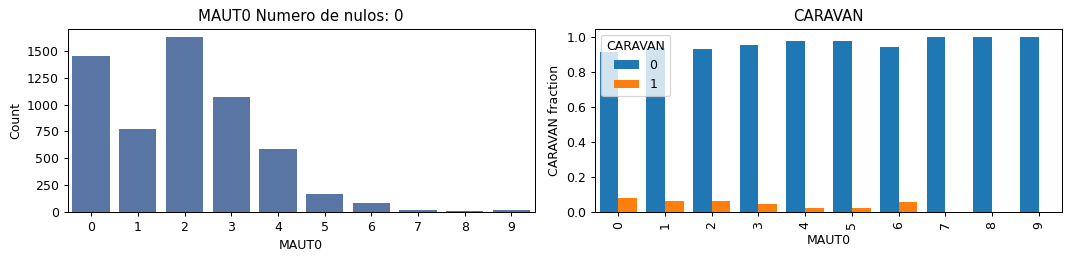

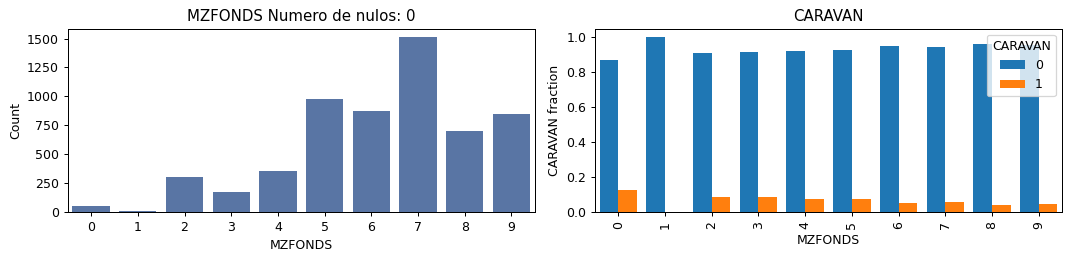

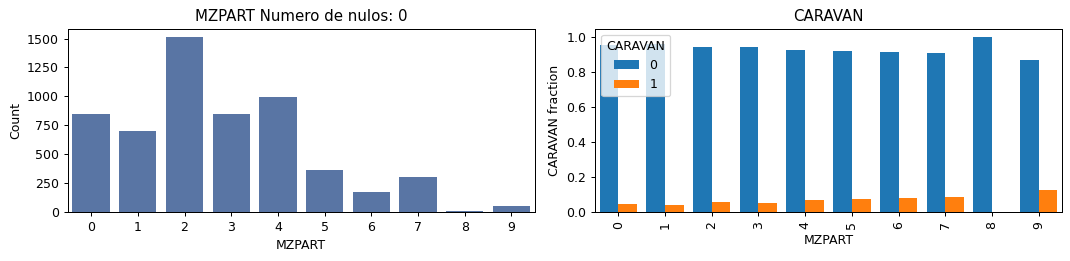

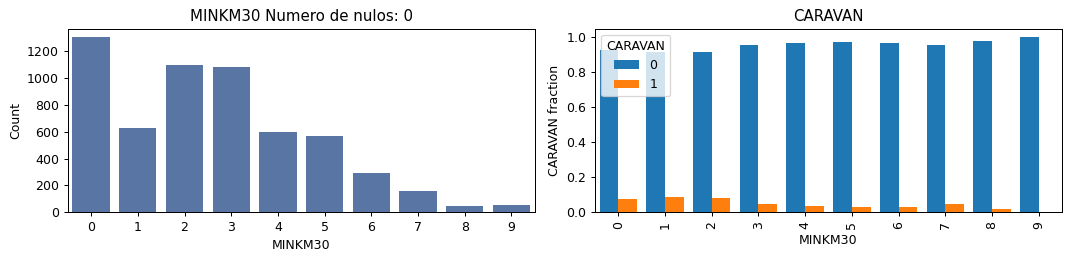

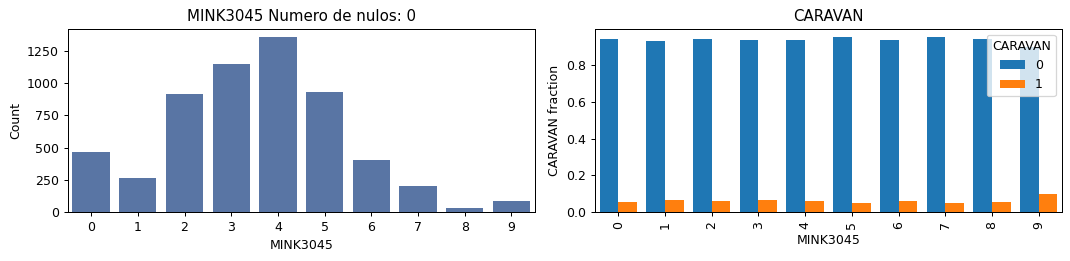

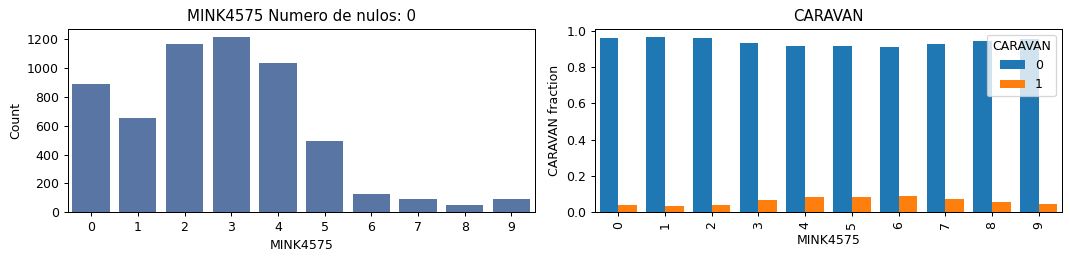

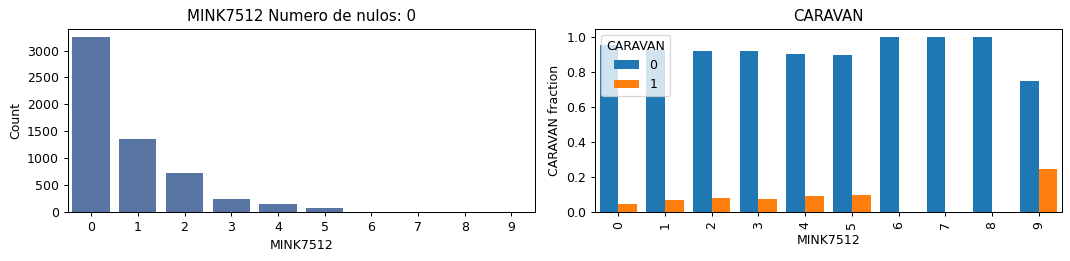

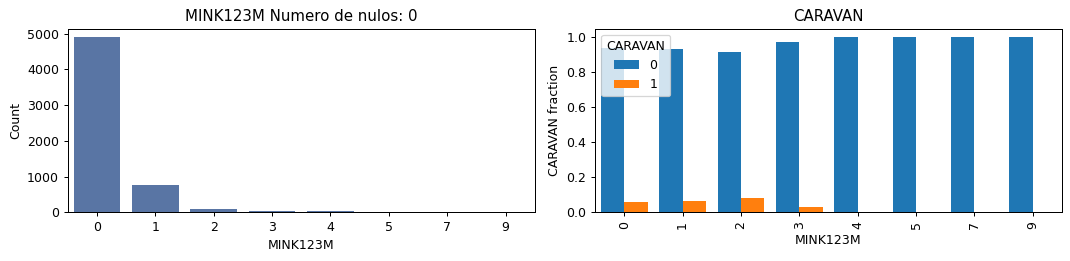

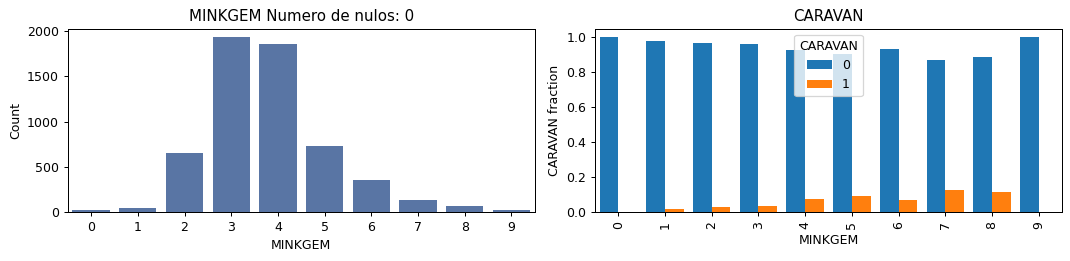

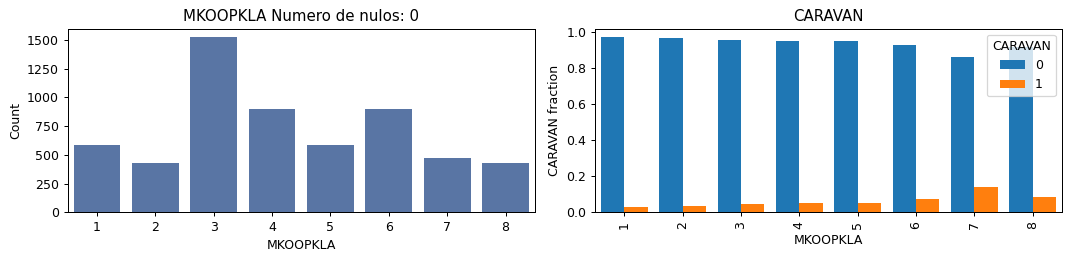

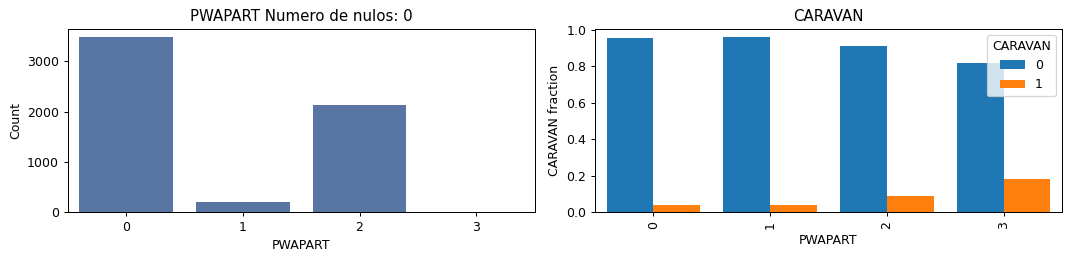

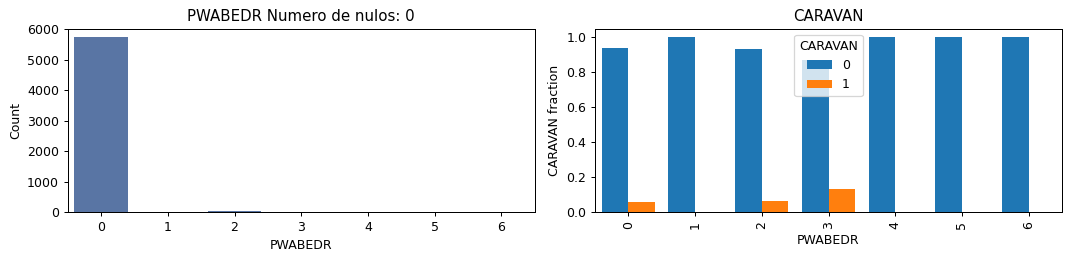

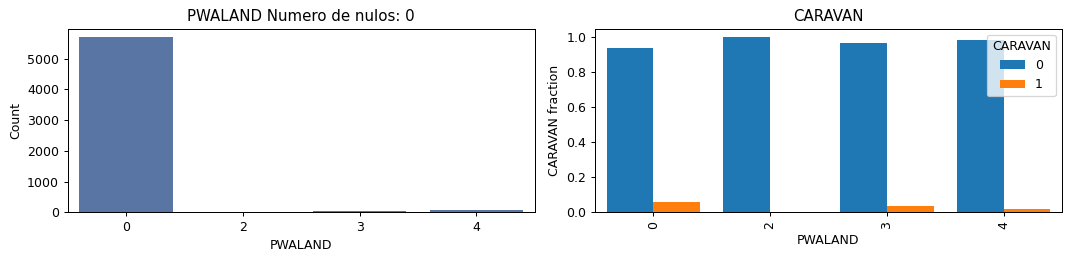

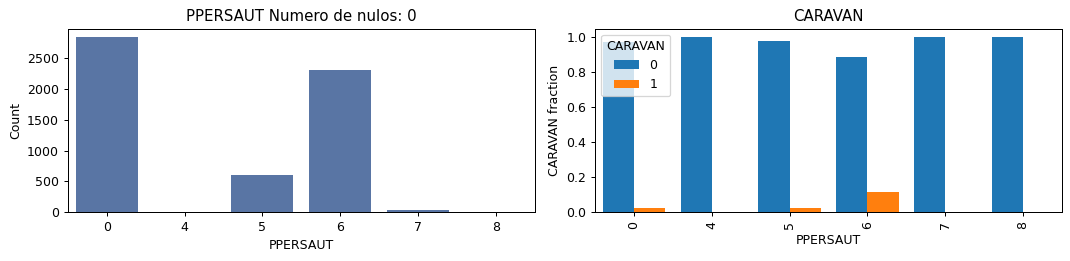

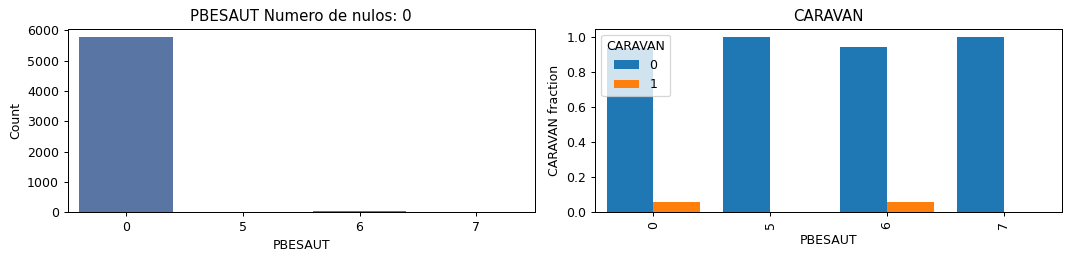

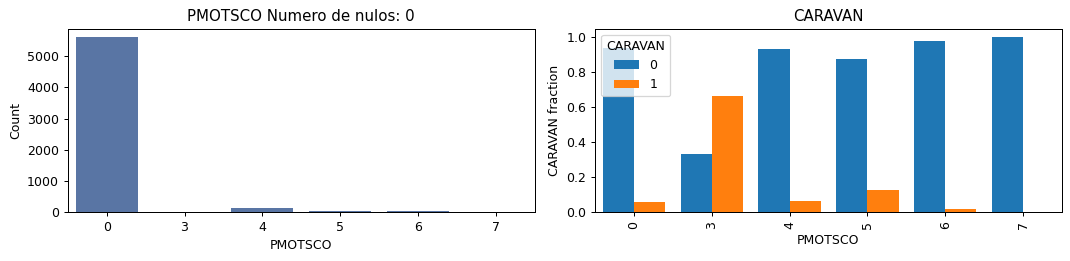

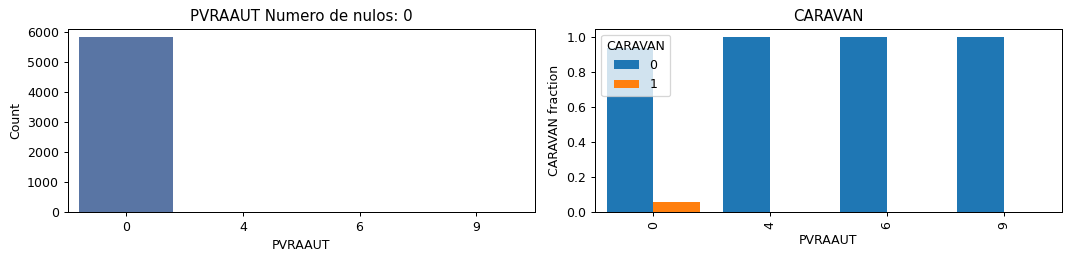

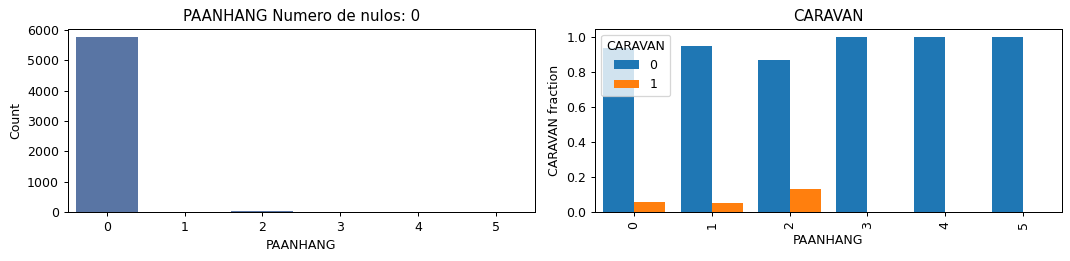

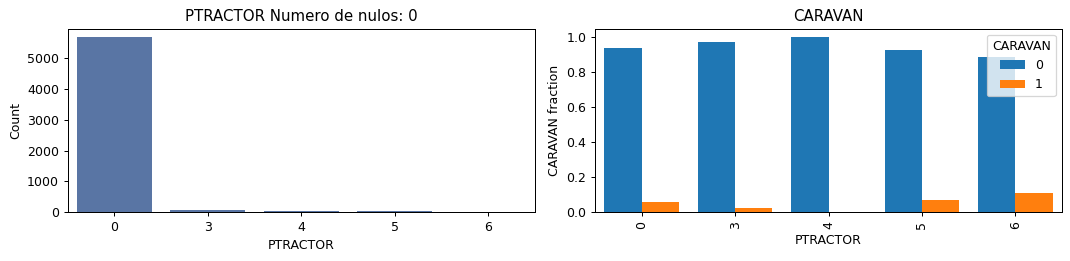

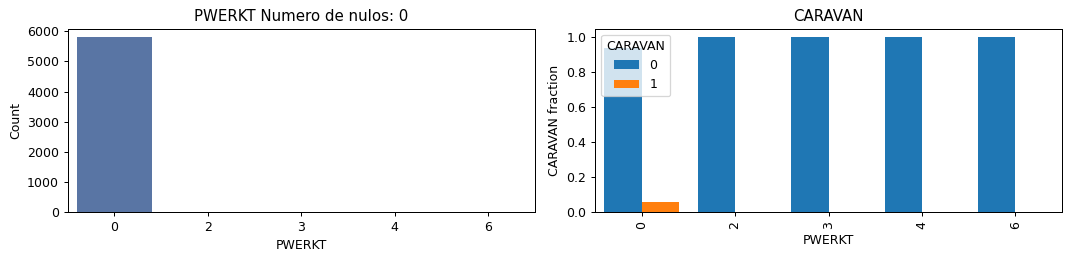

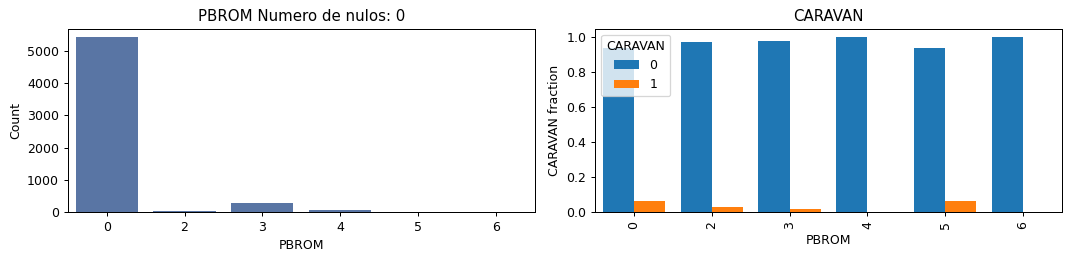

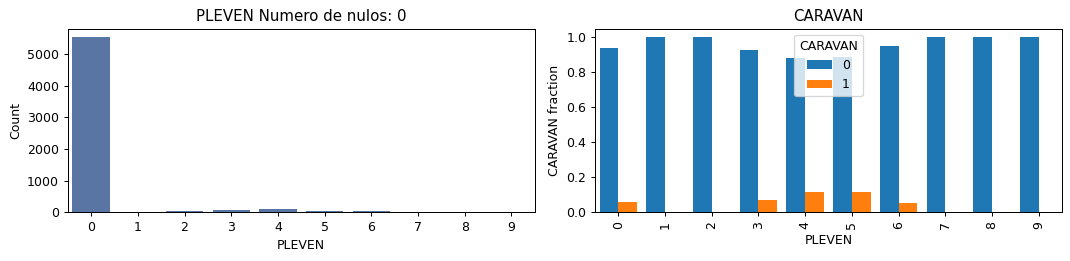

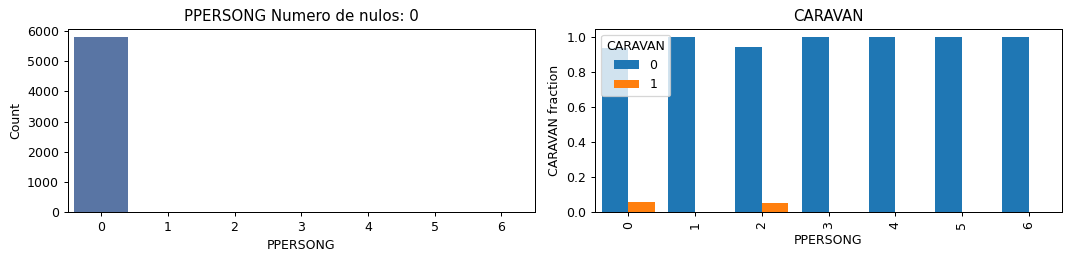

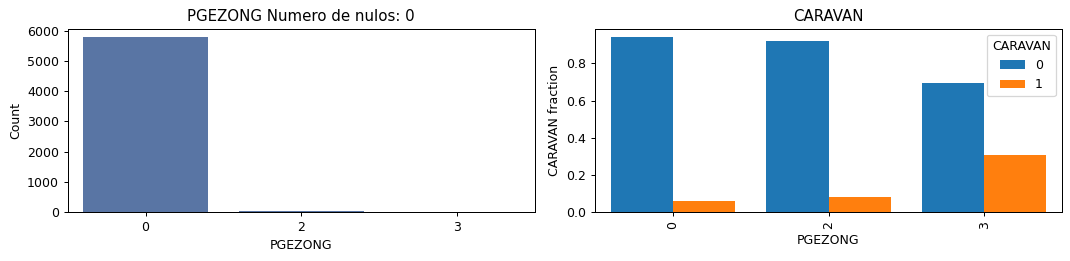

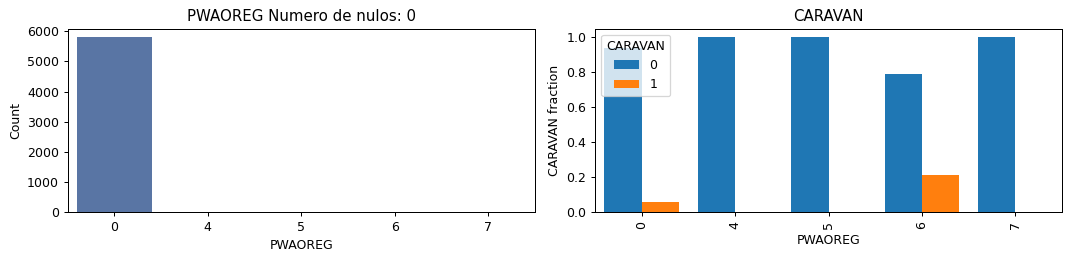

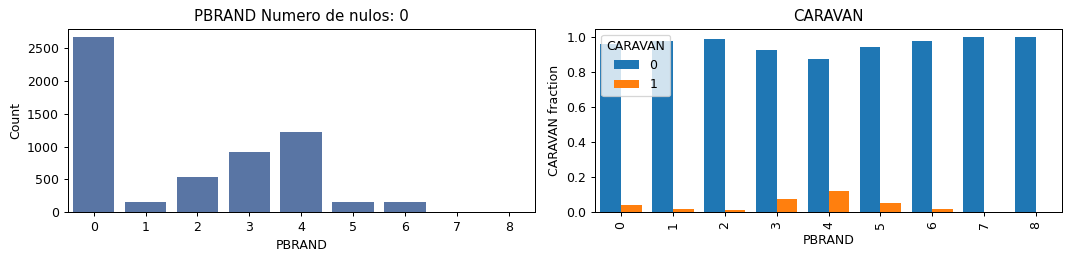

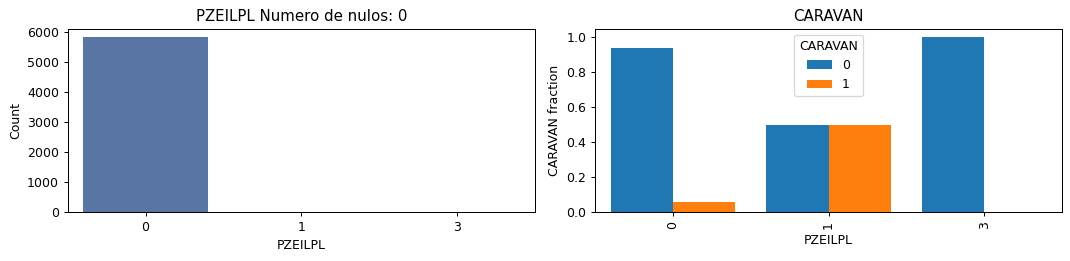

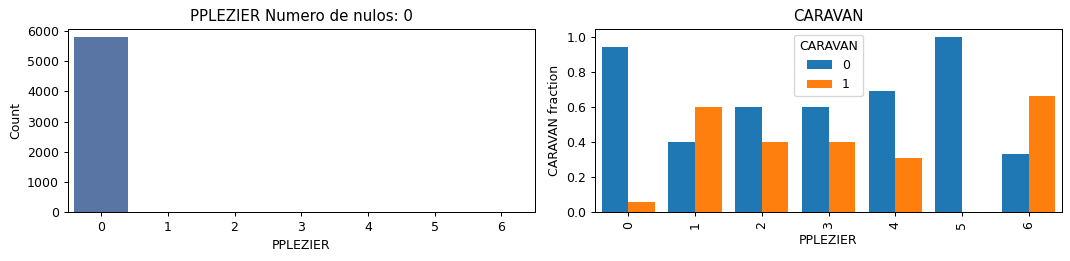

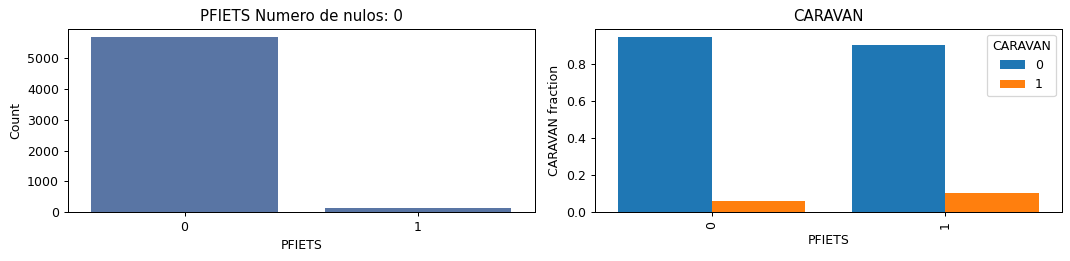

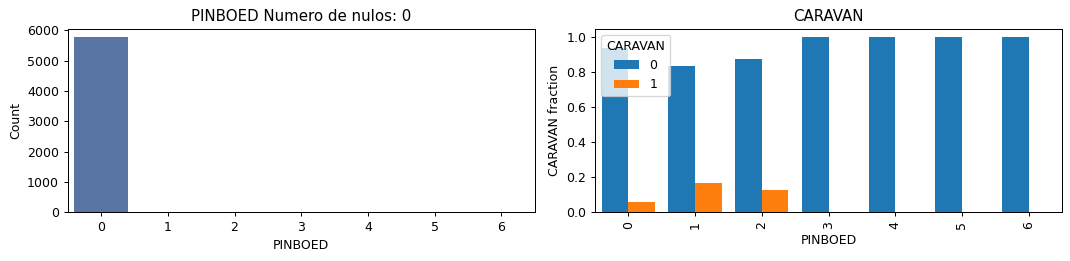

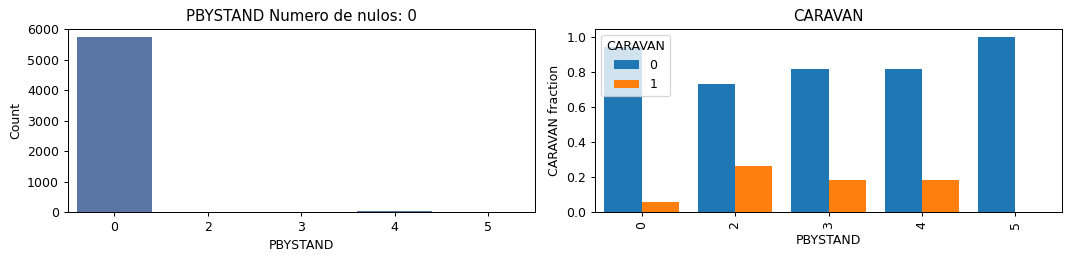

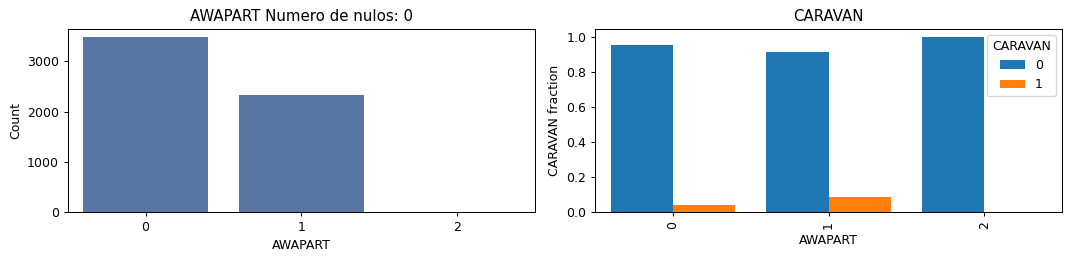

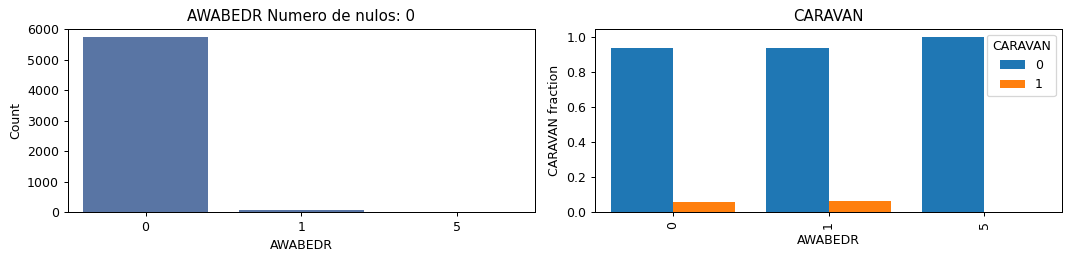

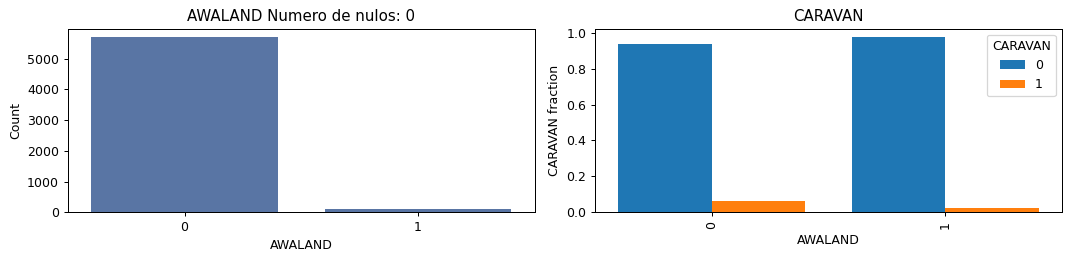

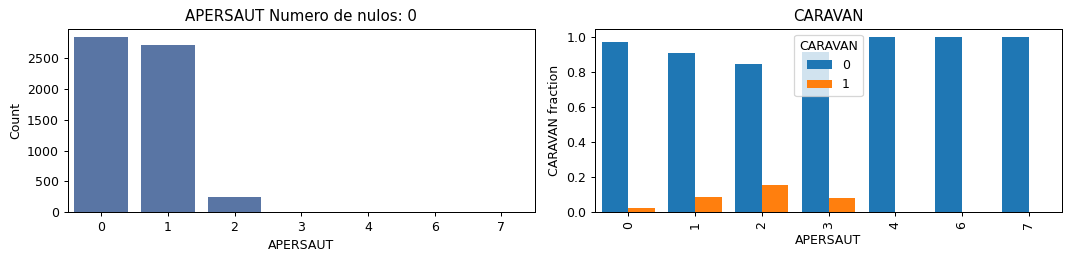

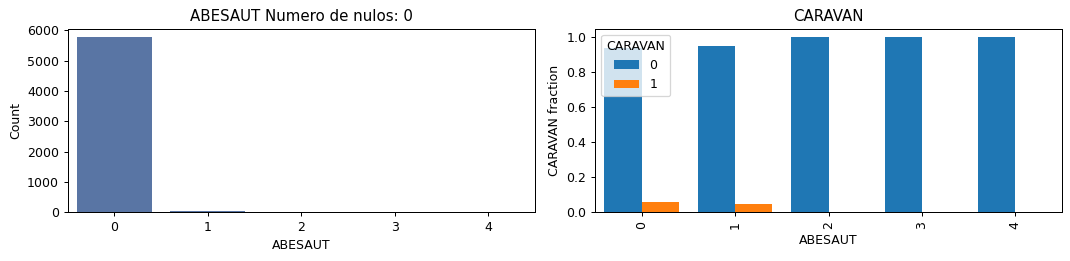

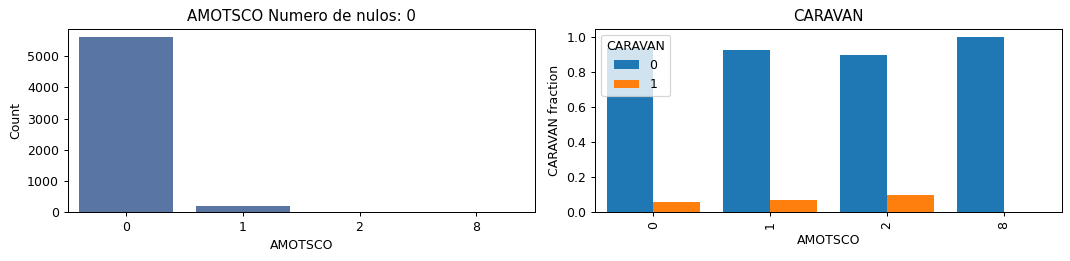

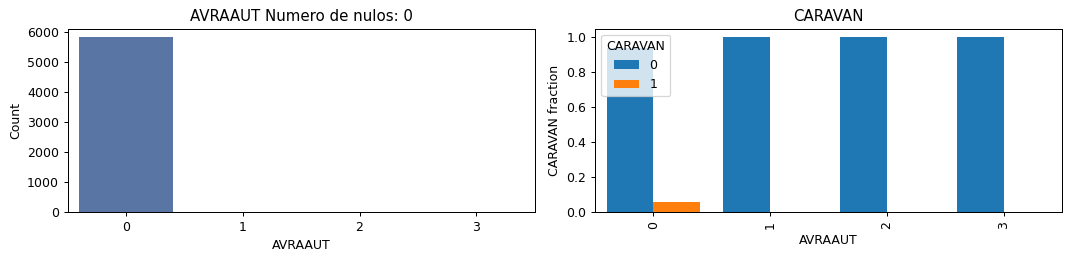

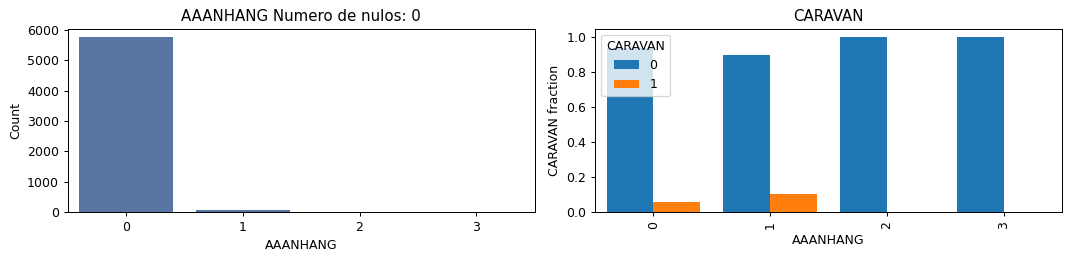

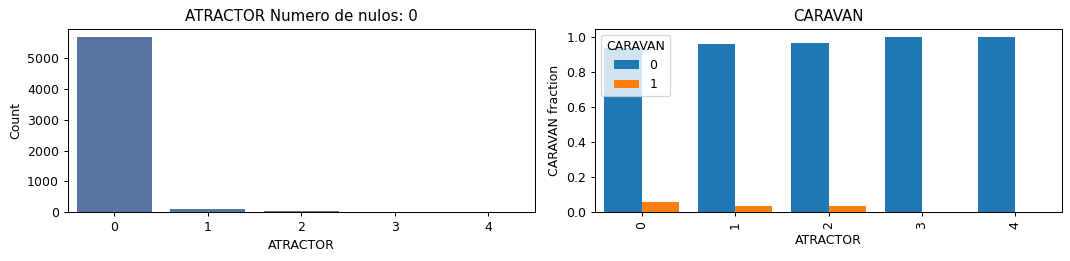

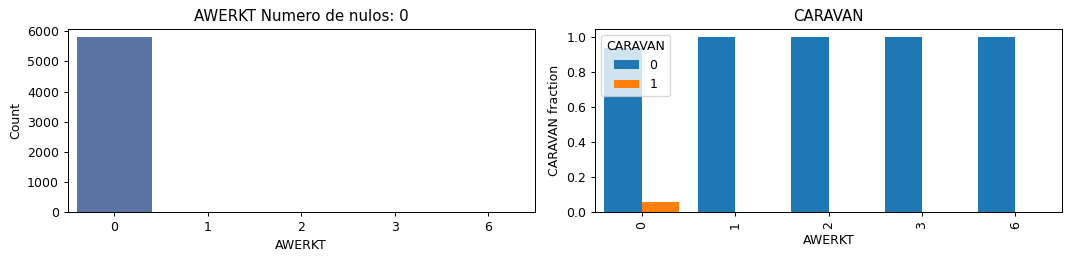

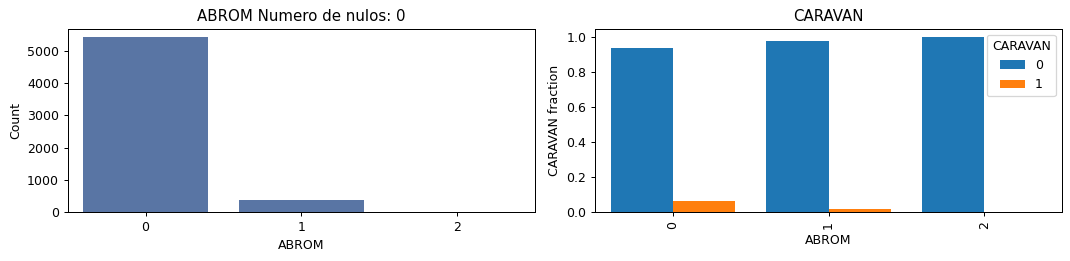

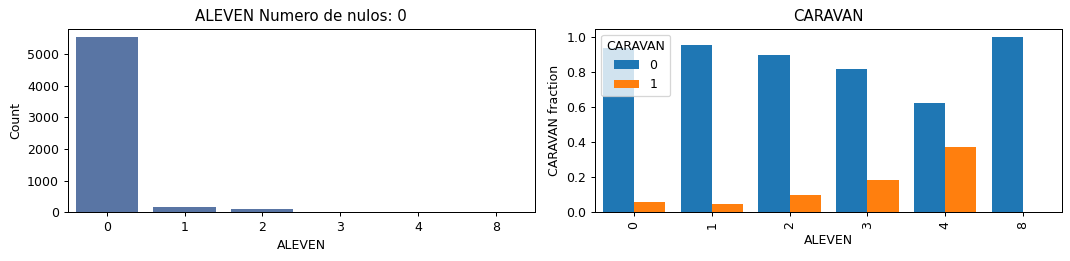

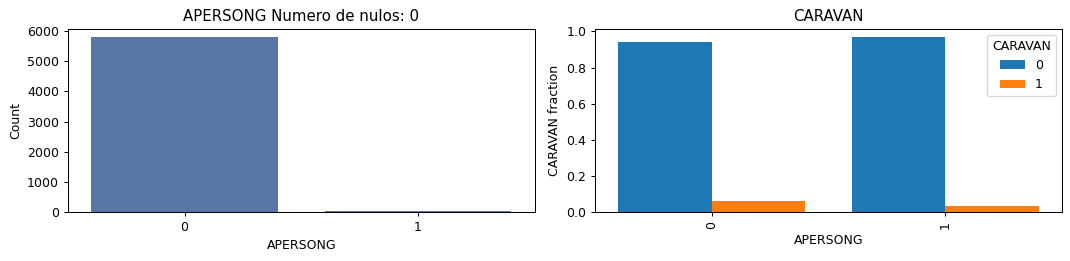

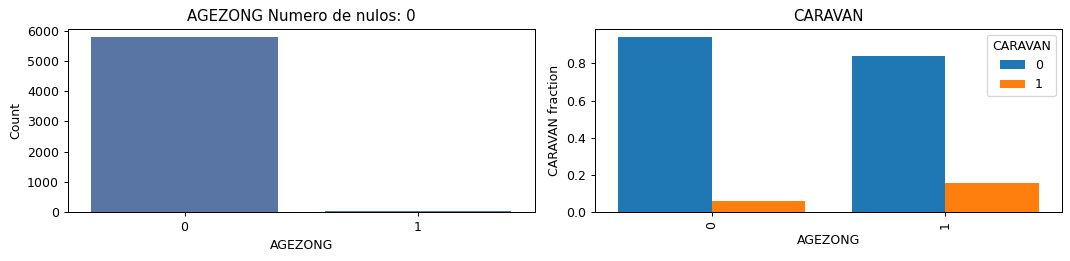

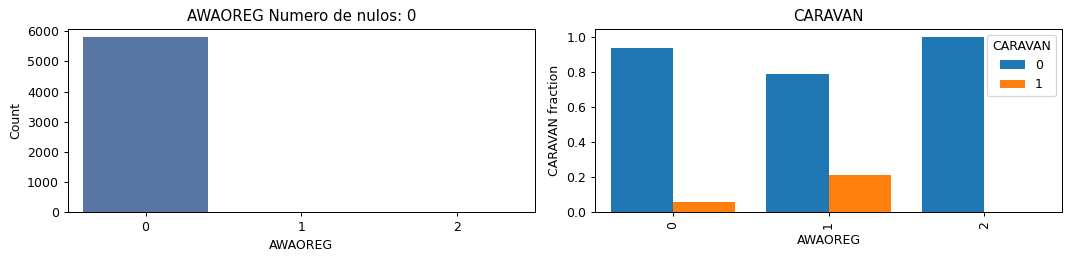

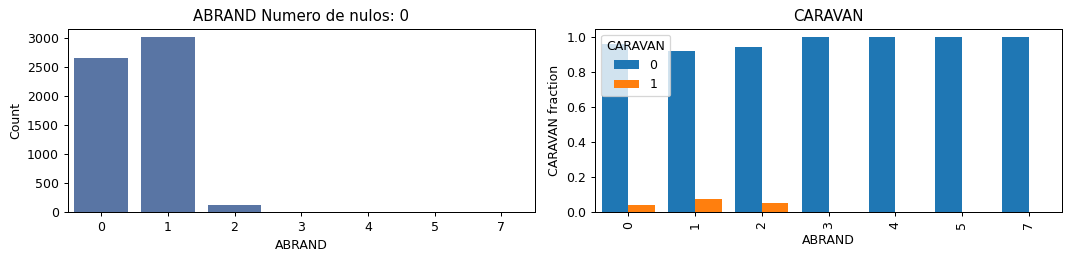

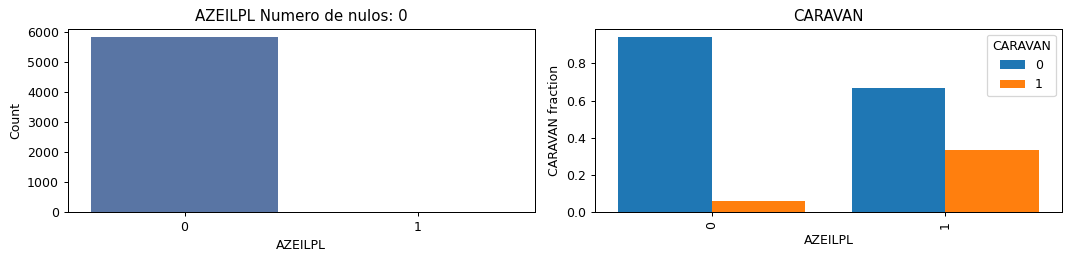

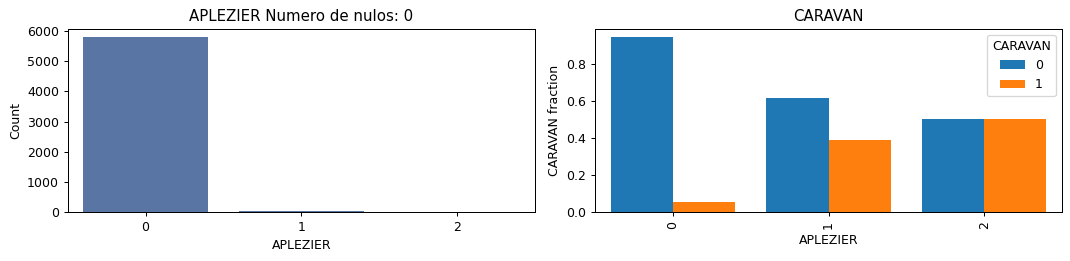

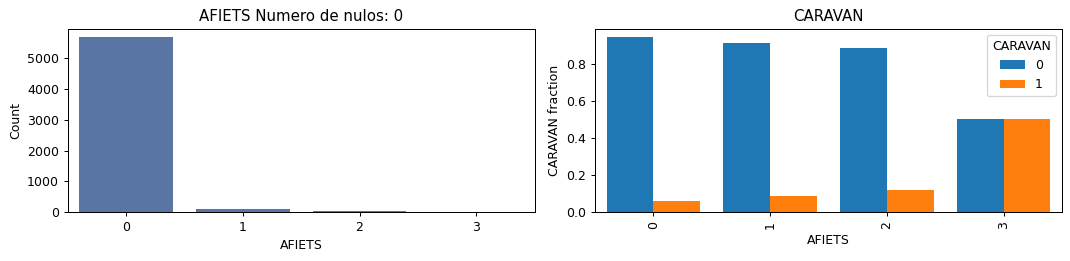

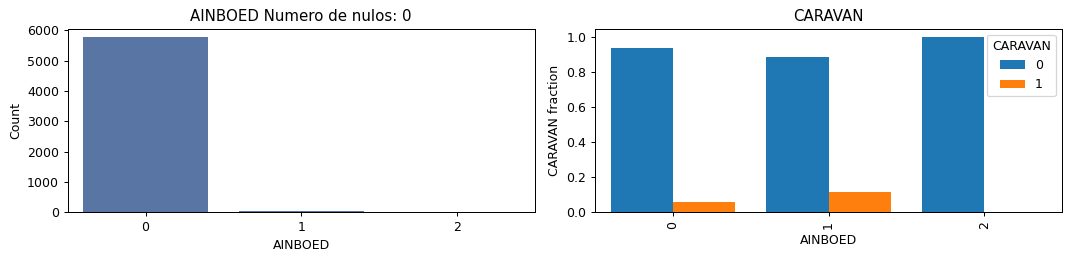

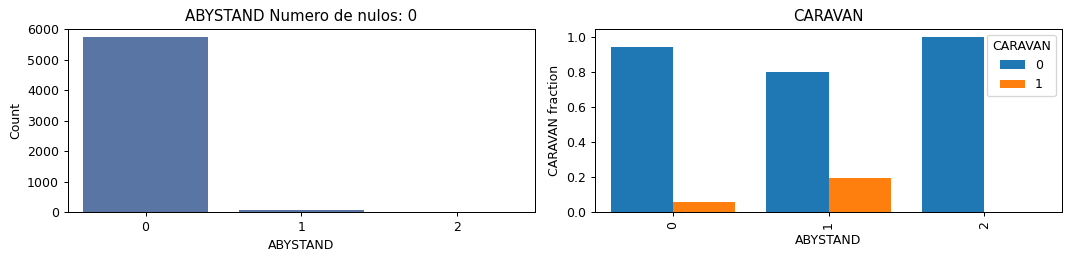

In [19]:
# warnings.filterwarnings('ignore')
for i in list(tic.columns):
    if (tic[i].dtype==float) & (i!='CARAVAN'):
        plot_feature(tic, col_name=i, isContinuous=True, target='CARAVAN')
    elif  i!='CARAVAN':
        plot_feature(tic, col_name=i, isContinuous=False, target='CARAVAN')

Con los siguientes gráficos vemos como se distribuyen las variables solas y relacionandolas con la variable objetivo. Este análisis no nos ayuda mucho ya que muchas son categóricas y se deben analizar de otra manera.

### Vamos ha dividir el análisis de las variables según sean númericas o categóricas

### Análisis variables númericas

C:\Users\Usuario\OneDrive\Documentos\anaconda\envs\mlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='AWABEDR'>

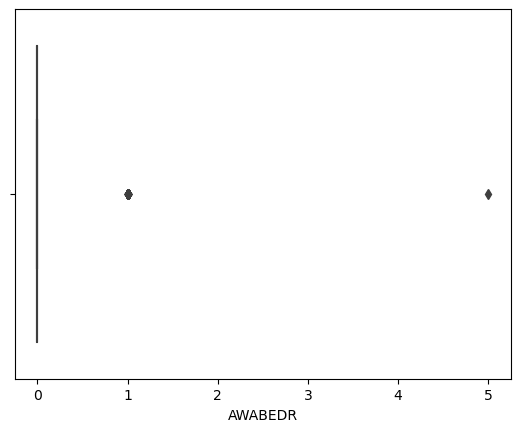

In [20]:
sns.boxplot(tic['AWABEDR'])

Las empresas suelen no tener seguros a terceros.

<AxesSubplot:xlabel='APERSAUT', ylabel='Count'>

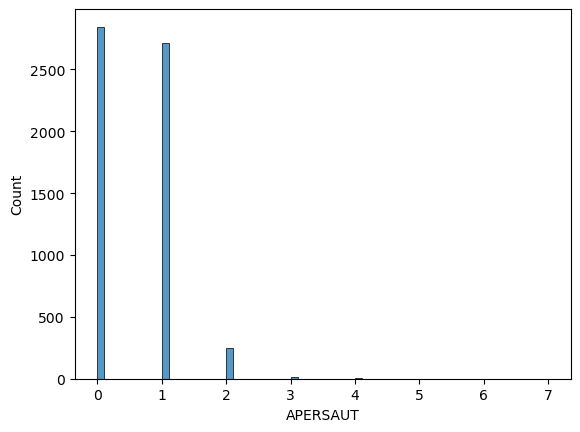

In [21]:
sns.histplot(tic['APERSAUT'])

El número de polizas de coches suelen ser 0 o 1.

<AxesSubplot:xlabel='ALEVEN', ylabel='Count'>

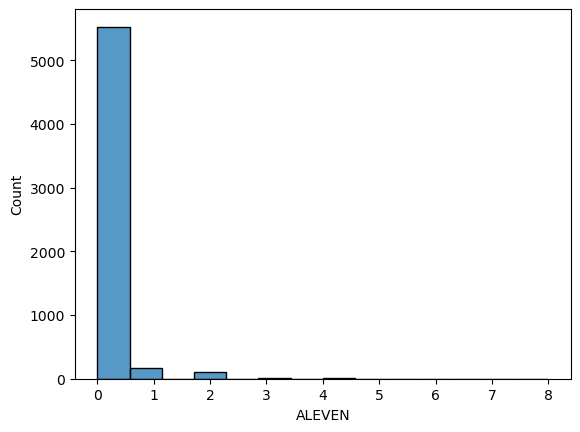

In [22]:
sns.histplot(tic['ALEVEN'])

Podemos ver que el número de seguros de vida que tienen los clientes suele ser uno. 

Estudio de outliers

In [23]:
def get_deviation_of_mean_perc(tic, tic_numericas, target, multiplier):
    """
    Devuelve el porcentaje de valores que exceden del intervalo de confianza
    :type series:
    :param multiplier:
    :return:
    """
    pd_final = pd.DataFrame()
    
    for i in tic_numericas:
        
        series_mean = tic[i].mean()
        series_std = tic[i].std()
        std_amp = multiplier * series_std
        left = series_mean - std_amp
        right = series_mean + std_amp
        size_s = tic[i].size
        
        perc_goods = tic[i][(tic[i] >= left) & (tic[i] <= right)].size/size_s
        perc_excess = tic[i][(tic[i] < left) | (tic[i] > right)].size/size_s
        
        if perc_excess>0:    
            pd_concat_percent = pd.DataFrame(tic[target][(tic[i] < left) | (tic[i] > right)]\
                                            .value_counts(normalize=True).reset_index()).T
            print('========', i)
            print('pd_concat_percent', pd_concat_percent.shape, pd_concat_percent.columns)
            print(pd_concat_percent.iloc[0,0])
            if pd_concat_percent.shape[1] == 1:
                pd_concat_percent['1'] = [1.0, 0.0]
            else:
                print(pd_concat_percent.iloc[0,1])
            print(pd_concat_percent)
            
            pd_concat_percent.columns = [pd_concat_percent.iloc[0,0], 
                                         pd_concat_percent.iloc[0,1]]
            pd_concat_percent = pd_concat_percent.drop('index',axis=0)
            pd_concat_percent['variable'] = i
            pd_concat_percent['sum_outlier_values'] = tic[i][(tic[i] < left) | (tic[i] > right)].size
            pd_concat_percent['porcentaje_sum_outliers_values'] = perc_excess
            pd_final = pd.concat([pd_final, pd_concat_percent], axis=0).reset_index(drop=True)
            
    if pd_final.empty:
        print('No existen variables con valores nulos')
        
    return pd_final

In [24]:
get_deviation_of_mean_perc(tic, tic_numericas, target='CARAVAN', multiplier=2)

======== MAANTHUI
pd_concat_percent (2, 2) RangeIndex(start=0, stop=2, step=1)
0.0
1.0
                0         1
index    0.000000  1.000000
CARAVAN  0.940541  0.059459
======== MFGEKIND
pd_concat_percent (2, 2) RangeIndex(start=0, stop=2, step=1)
0.0
1.0
                0         1
index    0.000000  1.000000
CARAVAN  0.928058  0.071942
======== MFWEKIND
pd_concat_percent (2, 2) RangeIndex(start=0, stop=2, step=1)
0.0
1.0
                0         1
index    0.000000  1.000000
CARAVAN  0.943953  0.056047
======== MAUT1
pd_concat_percent (2, 2) RangeIndex(start=0, stop=2, step=1)
0.0
1.0
                0         1
index    0.000000  1.000000
CARAVAN  0.989011  0.010989
======== MAUT2
pd_concat_percent (2, 2) RangeIndex(start=0, stop=2, step=1)
0.0
1.0
               0        1
index    0.00000  1.00000
CARAVAN  0.93733  0.06267
======== MAUT0
pd_concat_percent (2, 2) RangeIndex(start=0, stop=2, step=1)
0.0
1.0
                0         1
index    0.000000  1.000000
CARAVAN  0.965278

0.0       1.0  variable  sum_outlier_values  \
0   0.940541  0.059459  MAANTHUI                 555   
1   0.928058  0.071942  MFGEKIND                 139   
2   0.943953  0.056047  MFWEKIND                 339   
3   0.989011  0.010989     MAUT1                  91   
4   0.937330  0.062670     MAUT2                 367   
5   0.965278  0.034722     MAUT0                 144   
6   1.000000  0.000000   AWAPART                   6   
7   0.939024  0.060976   AWABEDR                  82   
8   0.975000  0.025000   AWALAND                 120   
9   0.852830  0.147170  APERSAUT                 265   
10  0.958333  0.041667   ABESAUT                  48   
11  0.927928  0.072072   AMOTSCO                 222   
12  1.000000  0.000000   AVRAAUT                   9   
13  0.907692  0.092308  AAANHANG                  65   
14  0.965035  0.034965  ATRACTOR                 143   
15  1.000000  0.000000    AWERKT                  21   
16  0.979798  0.020202     ABROM                 396   
17  0.921502  0.078498    ALEVEN                 293   
18  0.967742  0.032258  APERSONG                  31   
19  0.842105  0.157895   AGEZONG                  38   
20  0.826087  0.173913   AWAOREG                  23   
21  0.949640  0.050360    ABRAND                 139   
22  0.666667  0.333333   AZEILPL                   3   
23  0.606061  0.393939  APLEZIER                  33   
24  0.897959  0.102041    AFIETS                 147   
25  0.888889  0.111111   AINBOED                  45   
26  0.804878  0.195122  ABYSTAND                  82   

    porcentaje_sum_outliers_values  
0                         0.095328  
1                         0.023875  
2                         0.058227  
3                         0.015630  
4                         0.063037  
5                         0.024734  
6                         0.001031  
7                         0.014085  
8                         0.020611  
9                         0.045517  
10                        0.008245  
11                        0.038131  
12                        0.001546  
13                        0.011165  
14                        0.024562  
15                        0.003607  
16                        0.068018  
17                        0.050326  
18                        0.005325  
19                        0.006527  
20                        0.003951  
21                        0.023875  
22                        0.000515  
23                        0.005668  
24                        0.025249  
25                        0.007729  
26                        0.014085

El porcentaje de outliers de cada variable no supera el 1% en ningún caso, por lo que no es relevante eliminarlos.

Corelación de Pearson

Esta correlación nos muestra el grado de dependencia entre las variables.

In [25]:
def get_corr_matrix(dataset = None, metodo='pearson', size_figure=[10,8]):
    
    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1
    sns.set(style="white")
    # Compute the correlation matrix
    corr = dataset.corr(method=metodo) 
    # Set self-correlation to zero to avoid distraction
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_figure)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) #cbar_kws={"shrink": .5}
    plt.show()
    
    return 0

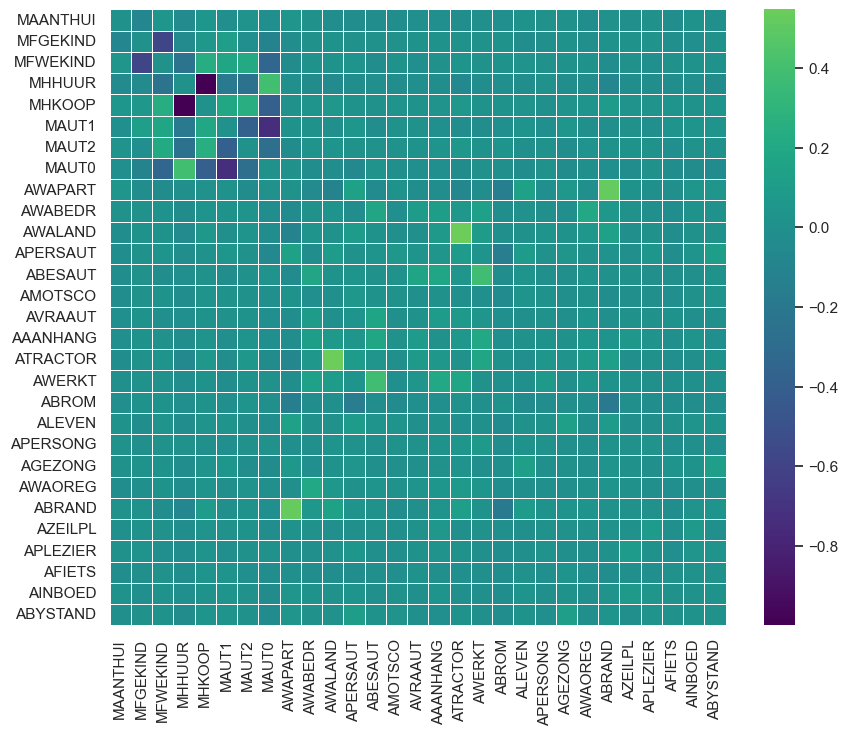

0

In [26]:
get_corr_matrix(dataset = tic_numericas,
                metodo='pearson', size_figure=[10,8])

El color predominante en esta matriz de correlación es el azul verdoso, nos indica que los valores estan entre el 0 y 0.25 por lo que entre las variables no existe una relación lineal fuerte. 

### Análisis de correlación entre la variable CARAVAN y el resto de variables categóricas. 

### Análisis variables categóricas

Elijo 3 variables para representarlas. En este caso, voy a ver cuantos clientes hay en cada variable por cada categoría. 

<AxesSubplot:xlabel='MGEMLEEF', ylabel='count'>

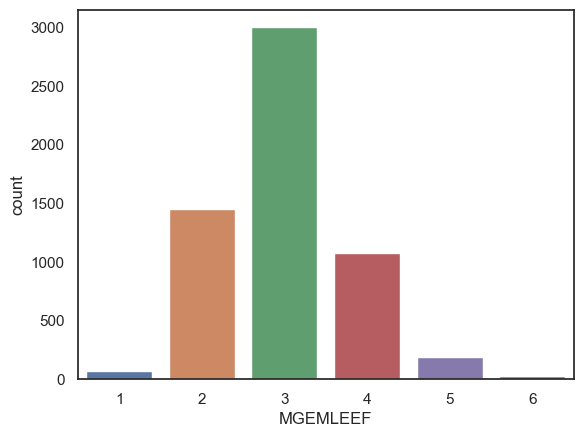

In [27]:
sns.countplot(x='MGEMLEEF', data=tic)

La mayoria de los clientes se tienen una media de edad de entre 40 y 50 años.

<AxesSubplot:xlabel='MOSTYPE', ylabel='count'>

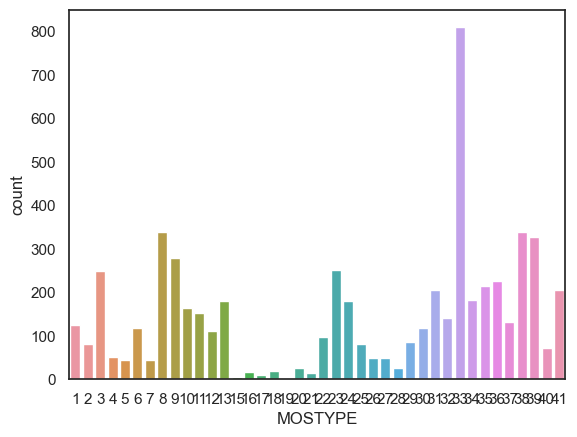

In [28]:
sns.countplot(x='MOSTYPE', data=tic)

Podemos decir que la mayoria de los clientes son familias grandes de clase baja.

<AxesSubplot:xlabel='AZEILPL', ylabel='count'>

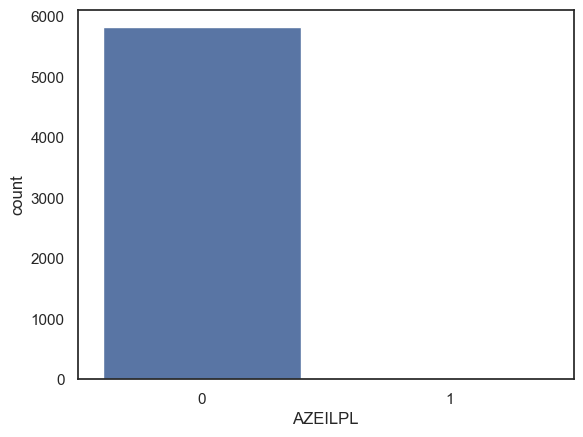

In [29]:
sns.countplot(x='AZEILPL', data=tic)

Esta variable es interesante, ya que, se concentra el 100% de clientes en una categoría, no tener seguro de tablas de surf.

El análisis de Cramer nos permite ver el grado de asociación entre las variables.

In [30]:
import scipy.stats as ss
def cramers_v(confusion_matrix):
    """ 
    calculate Cramers V statistic for categorial-categorial association.
    uses correction from Bergsma and Wicher,
    Journal of the Korean Statistical Society 42 (2013): 323-328
    
    confusion_matrix: tabla creada con pd.crosstab()
    
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [31]:
for i, var in enumerate(tic_categoricas.columns):
    confusion_matrix = pd.crosstab(tic_categoricas["CARAVAN"], tic_categoricas[var])
    print(i, cramers_v(confusion_matrix.values))


0 0.1214125245618953
1 0.030243996590796893
2 0.0
3 0.11698274512917237
4 0.06133135469764114
5 0.011961420404819938
6 0.05681982799852275
7 0.0392107064097822
8 0.08119222241325871
9 0.040821845823858366
10 0.09124021919390536
11 0.07271458978526386
12 0.0
13 0.043806512275053534
14 0.05268784814409118
15 0.06299303482198562
16 0.04994344919542805
17 0.08608184968100004
18 0.04532307942438214
19 0.0
20 0.0662220128865837
21 0.05578407787614905
22 0.05469114120189934
23 0.052551222491671
24 0.08617595715350806
25 0.0
26 0.0716795204794355
27 0.056539242337743115
28 0.0
29 0.10549998738432245
30 0.11417835774021888
31 0.0967392319560506
32 0.0
33 0.0
34 0.1805172111397274
35 0.0
36 0.05665441072703155
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0367676124226097
42 0.015145064204040964
43 0.0
44 0.04623224495705996
45 0.026075963384164017
46 0.15081040147537925
47 0.02919647283588463
48 0.11346381331047402
49 0.02290268344531061
50 0.0
51 0.06600692666455492
52 0.998471614741666


Ningún coeficiente supera el 0.2, 
por lo que las variables respecto a nuestra variable objetivo son bastante independientes.

In [32]:
def get_corr_matrix(dataset = None, metodo='spearman', size_figure=[10,8]):
    # Para obtener la correlación de Spearman, sólo cambiar el metodo por 'spearman'

    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1
    sns.set(style="white")
    # Compute the correlation matrix
    corr = dataset.corr(method=metodo) 
    # Set self-correlation to zero to avoid distraction
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_figure)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) #cbar_kws={"shrink": .5}
    plt.show()
    
    return 0

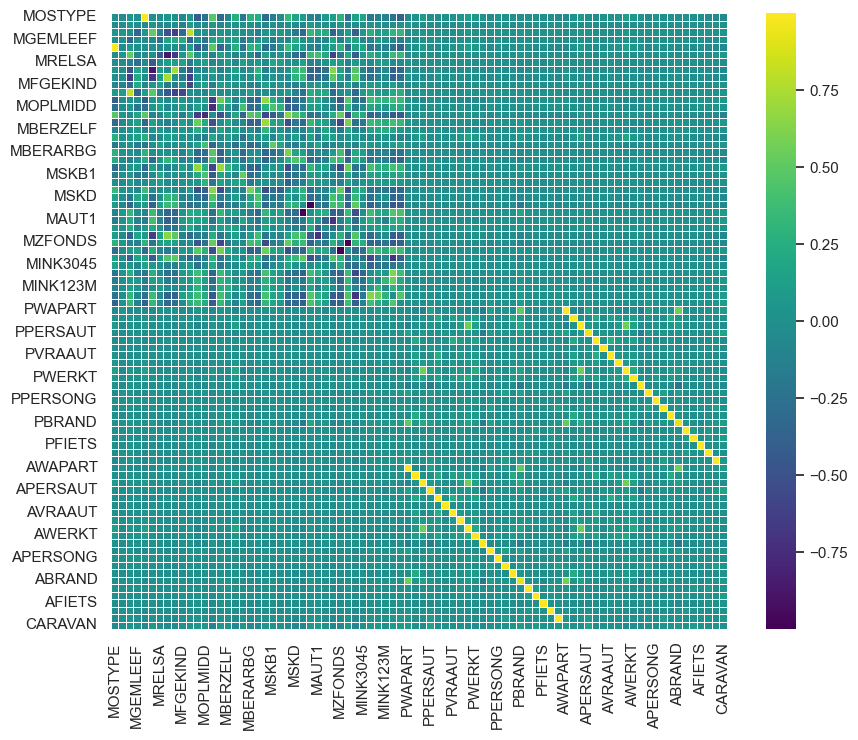

0

In [33]:
get_corr_matrix(dataset = tic, 
                metodo='spearman', size_figure=[10,8])

En esta matrix de correlacion de spearman podemos ver que, en general, el color dominante es el azul verdoso.
Esto nos indica que la mayoria de las correlaciones se encuentran entre el 0 y 0.25, por lo que practicamente 
no estan correlacionadas.